 # Some Simple models

Import modules

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Read data

In [383]:
df = pd.read_csv('D:\ML\Project\data/consumption.csv')
weather_avg = pd.read_csv('D:\ML\Project\data\weather-avg.csv')
weather_min = pd.read_csv('D:\ML\Project\data\weather-min.csv')
weather_max = pd.read_csv('D:\ML\Project\data\weather-max.csv')
info = pd.read_csv('D:\ML\Project\data\info.csv')

Sorting according to "meter_id" index:

In [505]:
weather_avg = weather_avg.set_index("meter_id")
weather_min = weather_min.set_index("meter_id")
weather_max = weather_max.set_index("meter_id")
info = info.set_index("meter_id")

""" 
make meter_id the index, if this is not used all data will be
erased because the default index is from 0 to 3248ish.
"""

KeyError: "None of ['meter_id'] are in the columns"

In [498]:
weather_avg_sorted = weather_avg.reindex(df.iloc[:,0])
weather_min_sorted = weather_min.reindex(df.iloc[:,0])
weather_max_sorted = weather_max.reindex(df.iloc[:,0])
info_sorted = info.reindex(df.iloc[:,0])
# in case you want to drop extra rows that were added automatically after using reindex:
# info_sorted.dropna()


In [506]:
weather_avg_sorted

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,4.904167,1.275000,2.225000,4.266667,0.262500,1.570833,7.833333,8.391667,6.904167,6.079167,...,8.666667,8.370833,8.662500,9.645833,4.008333,1.491667,0.562500,2.925000,9.383333,9.462500
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,5.283333,1.816667,2.304167,4.387500,1.708333,3.304167,6.879167,7.508333,7.070833,5.862500,...,8.862500,8.400000,8.670833,8.929167,5.079167,3.220833,1.012500,3.600000,9.229167,9.733333
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,7.125000,3.875000,3.250000,5.750000,2.958333,4.000000,8.958333,9.583333,9.083333,7.375000,...,10.958333,9.875000,10.041667,10.666667,6.583333,4.541667,3.041667,5.791667,11.625000,11.666667
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,7.125000,3.875000,3.250000,5.750000,2.958333,4.000000,8.958333,9.583333,9.083333,7.375000,...,10.958333,9.875000,10.041667,10.666667,6.583333,4.541667,3.041667,5.791667,11.625000,11.666667
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,4.416667,0.850000,1.354167,3.420833,0.762500,1.958333,8.025000,7.700000,6.279167,5.337500,...,9.012500,7.558333,7.795833,8.358333,3.904167,1.354167,0.650000,3.362500,9.170833,9.108333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,4.554167,0.687500,3.208333,4.554167,0.654167,2.937500,6.566667,7.491667,6.620833,6.412500,...,8.179167,7.308333,9.079167,9.558333,3.483333,1.487500,0.016667,1.187500,6.012500,8.387500
0xfdaf9f857621ec06f2cf801f42a020a322835090,5.270833,1.858333,2.175000,4.275000,1.629167,2.808333,6.775000,7.345833,7.100000,5.708333,...,8.454167,8.387500,8.704167,9.258333,4.637500,3.295833,0.741667,2.779167,8.729167,9.454167
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,5.133333,1.175000,2.431250,4.220833,-1.200000,2.152083,8.387500,8.116667,7.254167,6.131250,...,9.539583,8.437500,8.831818,9.658333,4.447826,1.958333,0.858333,3.934783,9.797917,9.852083


#### Data extraction

In [274]:
def get_monthi(n):
    begin=48*31*(n-1)+1
    end=48*31*n
    if n==1:
        begin=1
    if n>1:
        end-=3*48
    if n>2:
        begin-=3*48
    if n>3:
        end-=48
    if n>4:
        begin-=48
    if n>5:
        end-=48
    if n>6:
        begin-=48
    if n>8:
        end-=48
    if n>9:
        begin-=48
    if n>10:
        end-=48
    if n>11:
        begin-=48
    return begin,end

# Naive Drift

Check performance naive drift

In [278]:
pli=True #print log info
NaN_t=1200 #NaN threshold (entire month has 48*30= 1440 datapoint)->
# we want atleast 1/7th of a month of data in this case
totSSE=0
nSSE=0


# loop over all meter ids
for i in range(0,df.shape[0]):
    #load row
    meter=df.iloc[i]  #row.
    fmf=False #first month found -> this variable is needed because naive drift needs 2 data points
    
    # loop over all months
    for m in range (1,13):
        ind_b,ind_e=get_monthi(m)               #get index of beginning and end of month
        month=meter[ind_b:ind_e]

        # Check if months has numeric values        
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            mean_month=month.mean()
            
            #determine naive drift
            if fmf:
                ndrift=2*mean_month-last_month #last_month is the mean of the 
                #month just before mean_month.
                #evaluate prediction
                if m <12:
                    next_ind_b,next_ind_e=get_monthi(m+1) 
                    next_month=meter[next_ind_b:next_ind_e]
                    mnm=next_month.mean()         #mean next month
                    SSE=(mnm-ndrift)**2
                    totSSE+=SSE
                    nSSE+=1
                    if pli:
                        print("i=%i m=%i SSE=%f" % (i, m, SSE))
            else:
                fmf=True
            
            last_month=mean_month
              
        
        if pli:     
            print("Current month is %i" % m)
            print("Amount of NaN found %i" %n_NaN)


Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of

Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of 

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of 

Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 1439
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of Na

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of Na

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of N

Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 1487
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=548 m=11 SSE=0.000089
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=549 m=1

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=564 m=11 SSE=0.017285
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 335
i=565 m=1

Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=581 m=11 SSE=0.000009
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=582 m=11 SSE=0.000371
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of N

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=598 m=11 SSE=0.000467
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=599 m=11 SSE=0.000001
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of N

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=615 m=11 SSE=0.000070
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current m

Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=631 m=11 SSE=0.004151
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=632 m=11 SSE=0.000003
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=648 m=11 SSE=0.000001
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=649 m=1

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=664 m=11 SSE=0.000412
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=681 m=11 SSE=0.000186
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 335
i=682 m=1

Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=698 m=11 SSE=0.000250
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=699 m=11 SSE=0.003631
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of N

i=714 m=11 SSE=0.002636
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=715 m=11 SSE=0.000007
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of N

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=731 m=11 SSE=0.005954
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=732 m=1

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=748 m=11 SSE=0.000097
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=749 m=1

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=765 m=11 SSE=0.019119
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=766 m=1

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=781 m=11 SSE=0.002698
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=782 m=1

Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=798 m=11 SSE=0.007349
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 1439
Current month is 10
Amount of NaN found 287
i=799 m=11 SSE=0.000041
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of N

Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 240
i=814 m=10 SSE=0.021816
Current month is 10
Amount of NaN found 287
i=814 m=11 SSE=0.009839
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=815 m=10 SSE=0.003719
Current month is 10
Amount of NaN found 287
i=815 m=11 SSE=0.015546
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 384
i=830 m=10 SSE=0.000587
Current month is 10
Amount of NaN found 335
i=830 m=11 SSE=0.000176
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of N

Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=845 m=10 SSE=0.000002
Current month is 10
Amount of NaN found 287
i=845 m=11 SSE=0.000320
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=846 m=10 SSE=0.000288
Current month is 10
Amount of NaN found 287
i=846 m=11 SSE=0.000005
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Cur

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=860 m=10 SSE=0.000027
Current month is 10
Amount of NaN found 287
i=860 m=11 SSE=0.000063
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=861 m=10 SSE=0.132825
Current

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=875 m=10 SSE=0.000554
Current month is 10
Amount of NaN found 287
i=875 m=11 SSE=0.000090
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=876 m=10 SSE=0.000024
Current

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=892 m=10 SSE=0.000301
Current month is 10
Amount of NaN found 287
i=892 m=11 SSE=0.000805
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=893 m=10 SSE=0.010591
Current

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=910 m=10 SSE=0.000002
Current month is 10
Amount of NaN found 287
i=910 m=11 SSE=0.000047
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=911 m=10 SSE=0.002883
Current

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=925 m=10 SSE=0.049763
Current month is 10
Amount of NaN found 287
i=925 m=11 SSE=0.007408
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=926 m=10 SSE=0.008344
Current month is 10
Amount of NaN found 287
i=926 m=11 SSE=0.029343
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=942 m=10 SSE=0.000172
Current month is 10
Amount of NaN found 287
i=942 m=11 SSE=0.000024
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=943 m=10 SSE=0.012886
Current

Current month is 9
Amount of NaN found 144
i=957 m=10 SSE=0.004692
Current month is 10
Amount of NaN found 287
i=957 m=11 SSE=0.000239
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=958 m=10 SSE=0.000545
Current month is 10
Amount of NaN found 287
i=958 m=11 SSE=0.000287
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=974 m=10 SSE=0.000023
Current month is 10
Amount of NaN found 287
i=974 m=11 SSE=0.000179
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=975 m=10 SSE=0.000033
Current

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=990 m=10 SSE=0.000728
Current month is 10
Amount of NaN found 287
i=990 m=11 SSE=0.000502
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=991 m=10 SSE=0.000001
Current

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=1005 m=10 SSE=0.002010
Current month is 10
Amount of NaN found 287
i=1005 m=11 SSE=0.010232
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1006 m=10 SSE=0.000783
Curr

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1020 m=10 SSE=0.000211
Current month is 10
Amount of NaN found 287
i=1020 m=11 SSE=0.000901
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1021 m=10 SSE=0.000415
Curr

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=1035 m=10 SSE=0.000773
Current month is 10
Amount of NaN found 287
i=1035 m=11 SSE=0.000093
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 480
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1036 m=10 SSE=0.016969
Curr

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 144
i=1050 m=10 SSE=0.000180
Current month is 10
Amount of NaN found 287
i=1050 m=11 SSE=0.000019
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of

Current month is 9
Amount of NaN found 192
i=1066 m=10 SSE=0.000302
Current month is 10
Amount of NaN found 287
i=1066 m=11 SSE=0.000770
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 1487
Current month is 9
Amount of NaN found 192
i=1067 m=10 SSE=0.000124
Current month is 10
Amount of NaN found 287
i=1067 m=11 SSE=0.000327
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amoun

i=1083 m=10 SSE=0.000035
Current month is 10
Amount of NaN found 287
i=1083 m=11 SSE=0.000143
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1084 m=9 SSE=0.000703
Current month is 9
Amount of NaN found 144
i=1084 m=10 SSE=0.000693
Current month is 10
Amount of NaN found 287
i=1084 m=11 SSE=0.003042
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
C

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1099 m=9 SSE=0.000210
Current month is 9
Amount of NaN found 144
i=1099 m=10 SSE=0.000536
Current month is 10
Amount of NaN found 287
i=1099 m=11 SSE=0.001865
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 144
i=1100 

Current month is 8
Amount of NaN found 48
i=1114 m=9 SSE=0.000024
Current month is 9
Amount of NaN found 192
i=1114 m=10 SSE=0.000003
Current month is 10
Amount of NaN found 287
i=1114 m=11 SSE=0.000006
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1115 m=9 SSE=0.000283
Current month is 9
Amount of NaN found 192
i=1115 m=10 SSE=0.000227
Current month is 10
Amount of NaN found 287
i=1115 m=11 SSE=0.000532
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amoun

Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1129 m=9 SSE=0.000017
Current month is 9
Amount of NaN found 192
i=1129 m=10 SSE=0.000120
Current month is 10
Amount of NaN found 287
i=1129 m=11 SSE=0.000178
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1130 m=9 SSE=0.029439
Current month is 9
Amount of NaN found 192
i=1130 m=10 SSE=0.013796
Current month is 10
Amount of NaN found 287
i=1130 m=11 SSE=0.000156
Current month is 11
Amount of NaN found 48
Current month is 12
Amou

Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1143 m=9 SSE=0.001002
Current month is 9
Amount of NaN found 192
i=1143 m=10 SSE=0.006362
Current month is 10
Amount of NaN found 287
i=1143 m=11 SSE=0.006753
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1144 m=9 SSE=0.000578
Current month is 9
Amount of NaN found 192
i=1144 m=10 SSE=0.000041
Curr

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1157 m=9 SSE=0.012959
Current month is 9
Amount of NaN found 144
i=1157 m=10 SSE=0.000423
Current month is 10
Amount of NaN found 287
i=1157 m=11 SSE=0.000071
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 96
i=1158 m=9 SSE=0.000009
Current month is 9
Amount of

i=1173 m=9 SSE=0.001622
Current month is 9
Amount of NaN found 192
i=1173 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=1173 m=11 SSE=0.000584
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1174 m=9 SSE=0.004898
Current month is 9
Amount of NaN found 192
i=1174 m=10 SSE=0.005008
Current month is 10
Amount of NaN found 287
i=1174 m=11 SSE=0.003295
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amo

Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1188 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 192
i=1188 m=10 SSE=0.000847
Current month is 10
Amount of NaN found 287
i=1188 m=11 SSE=0.001418
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1189 m=9 SSE=0.000264
Current month is 9
Amount of NaN found 192
i=1189 m=10 SSE=0.000100
Current month is 10
Amount of NaN found 287
i=1189 m=11 SSE=0.002076
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1203 m=9 SSE=0.001578
Current month is 9
Amount of NaN found 192
i=1203 m=10 SSE=0.006355
Current month is 10
Amount of NaN found 287
i=1203 m=11 SSE=0.010057
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1204 m=9 SSE=0.004029
Current month is 9
Amount of

i=1218 m=10 SSE=0.010399
Current month is 10
Amount of NaN found 287
i=1218 m=11 SSE=0.006557
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1219 m=9 SSE=0.008183
Current month is 9
Amount of NaN found 144
i=1219 m=10 SSE=0.001184
Current month is 10
Amount of NaN found 287
i=1219 m=11 SSE=0.000664
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
C

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1234 m=9 SSE=0.000022
Current month is 9
Amount of NaN found 192
i=1234 m=10 SSE=0.000492
Current month is 10
Amount of NaN found 287
i=1234 m=11 SSE=0.000923
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1235 m=9 SSE=0.000003
Current month is 9
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1249 m=9 SSE=0.000006
Current month is 9
Amount of NaN found 192
i=1249 m=10 SSE=0.000189
Current month is 10
Amount of NaN found 287
i=1249 m=11 SSE=0.000445
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1250 m=9 SSE=0.000309
Current month is 9
Amount of

i=1264 m=10 SSE=0.000093
Current month is 10
Amount of NaN found 287
i=1264 m=11 SSE=0.001045
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1265 m=9 SSE=0.002499
Current month is 9
Amount of NaN found 192
i=1265 m=10 SSE=0.000128
Current month is 10
Amount of NaN found 287
i=1265 m=11 SSE=0.005509
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
C

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 480
i=1280 m=9 SSE=0.011958
Current month is 9
Amount of NaN found 960
i=1280 m=10 SSE=0.006818
Current month is 10
Amount of NaN found 911
i=1280 m=11 SSE=0.000116
Current month is 11
Amount of NaN found 384
Current month is 12
Amount of NaN found 480
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1281 m=9 SSE=0.000710
Current month is 9
Amount 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1294 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 144
i=1294 m=10 SSE=0.000006
Current month is 10
Amount of NaN found 287
i=1294 m=11 SSE=0.000021
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1295 m=9 SSE=0.000029
Current month is 9
Amount of

Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1310 m=9 SSE=0.000915
Current month is 9
Amount of NaN found 192
i=1310 m=10 SSE=0.000204
Current month is 10
Amount of NaN found 287
i=1310 m=11 SSE=0.425141
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1311 m=9 SSE=0.000435
Current month is 9
Amount of NaN found 192
i=1311 m=10 SSE=0.000655
Current month is 10
Amount of NaN found 287
i=13

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1324 m=9 SSE=0.010817
Current month is 9
Amount of NaN found 144
i=1324 m=10 SSE=0.010991
Current month is 10
Amount of NaN found 287
i=1324 m=11 SSE=0.000978
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1325 m=9 SSE=0.000219
Current month is 9
Amount of

Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1339 m=9 SSE=0.000007
Current month is 9
Amount of NaN found 192
i=1339 m=10 SSE=0.000084
Current month is 10
Amount of NaN found 335
i=1339 m=11 SSE=0.002050
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 1487
Current month is 8
Amount of NaN found 48
i=1340 m=9 SSE=0.000001
Curr

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1356 m=8 SSE=0.002969
Current month is 8
Amount of NaN found 48
i=1356 m=9 SSE=0.000087
Current month is 9
Amount of NaN found 192
i=1356 m=10 SSE=0.013061
Current month is 10
Amount of NaN found 287
i=1356 m=11 SSE=0.033481
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1357 m=8 SSE=0.000087
Current month is 8
Amount of NaN found 48
i=1357 m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1370 m=8 SSE=0.000056
Current month is 8
Amount of NaN found 48
i=1370 m=9 SSE=0.000235
Current month is 9
Amount of NaN found 144
i=1370 m=10 SSE=0.011692
Current month is 10
Amount of NaN found 287
i=1370 m=11 SSE=0.004022
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1371 m=8 SSE=0.010182
Current month is 8
Amount of NaN found 48
i=1371 m

i=1384 m=9 SSE=0.000053
Current month is 9
Amount of NaN found 192
i=1384 m=10 SSE=0.000004
Current month is 10
Amount of NaN found 287
i=1384 m=11 SSE=0.000381
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1385 m=8 SSE=0.000015
Current month is 8
Amount of NaN found 48
i=1385 m=9 SSE=0.017756
Current month is 9
Amount of NaN found 192
i=1385 m=10 SSE=0.030176
Current month is 10
Amount of NaN found 287
i=1385 m=11 SSE=0.012087
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487


Current month is 7
Amount of NaN found 48
i=1398 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=1398 m=9 SSE=0.000138
Current month is 9
Amount of NaN found 192
i=1398 m=10 SSE=0.000062
Current month is 10
Amount of NaN found 287
i=1398 m=11 SSE=0.000304
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 480
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1399 m=8 SSE=0.000810
Current month is 8
Amount of NaN found 48
i=1399 m=9 SSE=0.003164
Current month is 9
Amount of NaN found 192
i=1399 m=10 SSE=0.000269
Current month is 10
Amount of NaN found 287
i=1399 m=11 SSE=0.002313
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 7
Amount of NaN found 48
i=1412 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 96
i=1412 m=9 SSE=0.000323
Current month is 9
Amount of NaN found 192
i=1412 m=10 SSE=0.001949
Current month is 10
Amount of NaN found 335
i=1412 m=11 SSE=0.000055
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1413 m=8 SSE=0.000397
Current month is 8
Amount of NaN found 48
i=1413 m=9 SSE=0.000028
Current month is 9
Amount of NaN found 144
i=1413 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=1413 m=11 SSE=0.001005
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1428 m=8 SSE=0.000235
Current month is 8
Amount of NaN found 48
i=1428 m=9 SSE=0.001854
Current month is 9
Amount of NaN found 192
i=1428 m=10 SSE=0.000643
Current month is 10
Amount of NaN found 287
i=1428 m=11 SSE=0.000362
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1429 m=8 SSE=0.000021
Current month is 8
Amount of NaN found 96
i=1429 m

Current month is 7
Amount of NaN found 48
i=1442 m=8 SSE=0.000014
Current month is 8
Amount of NaN found 48
i=1442 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 192
i=1442 m=10 SSE=0.000024
Current month is 10
Amount of NaN found 287
i=1442 m=11 SSE=0.000069
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1443 m=8 SSE=0.000178
Current month is 8
Amount of NaN found 48
i=1443 m=9 SSE=0.000568
Current month is 9
Amount of NaN found 192
i=1443 m=10 SSE=0.000107
Current month is 10
Amount of NaN found 287
i=1443 m=11 SSE=0.000016
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1456 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=1456 m=9 SSE=0.000047
Current month is 9
Amount of NaN found 192
i=1456 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=1456 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1457 m=8 SSE=0.000359
Current month is 8
Amount of NaN found 48
i=1457 m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1471 m=8 SSE=0.047820
Current month is 8
Amount of NaN found 48
i=1471 m=9 SSE=0.013718
Current month is 9
Amount of NaN found 192
i=1471 m=10 SSE=0.000094
Current month is 10
Amount of NaN found 287
i=1471 m=11 SSE=0.000134
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 144
i=1472 m=8 SSE=0.000384
Current month is 8
Amount of NaN found 96
i=1472 

i=1484 m=11 SSE=0.000147
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1485 m=8 SSE=0.000049
Current month is 8
Amount of NaN found 48
i=1485 m=9 SSE=0.000056
Current month is 9
Amount of NaN found 192
i=1485 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=1485 m=11 SSE=0.000262
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Curr

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 96
i=1499 m=8 SSE=0.000003
Current month is 8
Amount of NaN found 48
i=1499 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 144
i=1499 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=1499 m=11 SSE=0.000036
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1500 m=8 SSE=0.000058
Current month is 8
Amount of NaN found 48
i=1500 m

i=1513 m=11 SSE=0.000115
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 0
i=1514 m=8 SSE=0.011222
Current month is 8
Amount of NaN found 0
i=1514 m=9 SSE=0.003587
Current month is 9
Amount of NaN found 48
i=1514 m=10 SSE=0.052410
Current month is 10
Amount of NaN found 0
Current month is 11
Amount of NaN found 1391
Current month is 12
Amount of NaN found 144
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1529 m=8 SSE=0.000008
Current month is 8
Amount of NaN found 48
i=1529 m=9 SSE=0.000378
Current month is 9
Amount of NaN found 192
i=1529 m=10 SSE=0.003099
Current month is 10
Amount of NaN found 287
i=1529 m=11 SSE=0.008452
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1530 m=8 SSE=0.000152
Current month is 8
Amount of NaN found 48
i=1530 m

i=1542 m=10 SSE=0.001515
Current month is 10
Amount of NaN found 287
i=1542 m=11 SSE=0.000766
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 143
i=1543 m=8 SSE=0.000113
Current month is 8
Amount of NaN found 48
i=1543 m=9 SSE=0.000394
Current month is 9
Amount of NaN found 192
i=1543 m=10 SSE=0.000231
Current month is 10
Amount of NaN found 287
i=1543 m=11 SSE=0.001533
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amo

Amount of NaN found 48
i=1556 m=9 SSE=0.000002
Current month is 9
Amount of NaN found 192
i=1556 m=10 SSE=0.006347
Current month is 10
Amount of NaN found 287
i=1556 m=11 SSE=0.017403
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 96
i=1557 m=8 SSE=0.000003
Current month is 8
Amount of NaN found 48
i=1557 m=9 SSE=0.000232
Current month is 9
Amount of NaN found 336
i=1557 m=10 SSE=0.001105
Current month is 10
Amount of NaN found 335
i=1557 m=11 SSE=0.001261
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Am

Current month is 7
Amount of NaN found 96
i=1571 m=8 SSE=0.000091
Current month is 8
Amount of NaN found 96
i=1571 m=9 SSE=0.000040
Current month is 9
Amount of NaN found 192
i=1571 m=10 SSE=0.000241
Current month is 10
Amount of NaN found 287
i=1571 m=11 SSE=0.000022
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1572 m=8 SSE=0.000060
Current month is 8
Amount of NaN found 48
i=1572 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 192
i=1572 m=10 SSE=0.003258
Current month is 10
Amount of NaN found 287
i=1572 m=11 SSE=0.000537
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1586 m=8 SSE=0.000339
Current month is 8
Amount of NaN found 48
i=1586 m=9 SSE=0.000688
Current month is 9
Amount of NaN found 192
i=1586 m=10 SSE=0.000246
Current month is 10
Amount of NaN found 287
i=1586 m=11 SSE=0.000019
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1587 m=8 SSE=0.006994
Current month is 8
Amount of NaN found 48
i=1587 m

Current month is 7
Amount of NaN found 48
i=1601 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=1601 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 144
i=1601 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=1601 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1602 m=8 SSE=0.005589
Current month is 8
Amount of NaN found 48
i=1602 m=9 SSE=0.003383
Current month is 9
Amount of NaN found 192
i=1602 m=10 SSE=0.003270
Current month is 10
Amount of NaN found 287
i=1602 m=11 SSE=0.000891
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1616 m=8 SSE=0.000185
Current month is 8
Amount of NaN found 48
i=1616 m=9 SSE=0.000085
Current month is 9
Amount of NaN found 192
i=1616 m=10 SSE=0.004410
Current month is 10
Amount of NaN found 287
i=1616 m=11 SSE=0.000930
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 1439
Current month is 7
Amount of NaN found 48
i=1617 m=8 SSE=0.000092
Current month is 8
Amount of NaN found 48
i=1617 m

i=1629 m=8 SSE=0.000330
Current month is 8
Amount of NaN found 48
i=1629 m=9 SSE=0.002377
Current month is 9
Amount of NaN found 192
i=1629 m=10 SSE=0.020440
Current month is 10
Amount of NaN found 287
i=1629 m=11 SSE=0.006253
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1630 m=7 SSE=0.000626
Current month is 7
Amount of NaN found 48
i=1630 m=8 SSE=0.000953
Current month is 8
Amount of NaN found 96
i=1630 m=9 SSE=0.000874
Current month is 9
Amount of NaN found 192
i=1630 m=10 SSE=0.036977
Current month is 10
Amount of NaN found 287
i=1630 m=11 SSE=0.006065
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 431
Current month is 1
Amount of NaN found 1487
C

i=1643 m=9 SSE=0.005550
Current month is 9
Amount of NaN found 144
i=1643 m=10 SSE=0.005619
Current month is 10
Amount of NaN found 287
i=1643 m=11 SSE=0.007137
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1644 m=7 SSE=0.000129
Current month is 7
Amount of NaN found 48
i=1644 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=1644 m=9 SSE=0.020209
Current month is 9
Amount of NaN found 144
i=1644 m=10 SSE=0.081661
Current month is 10
Amount of NaN found 287
i=1644 m=11 SSE=0.160588
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amou

i=1656 m=7 SSE=0.000257
Current month is 7
Amount of NaN found 48
i=1656 m=8 SSE=0.001662
Current month is 8
Amount of NaN found 48
i=1656 m=9 SSE=0.000173
Current month is 9
Amount of NaN found 192
i=1656 m=10 SSE=0.001768
Current month is 10
Amount of NaN found 287
i=1656 m=11 SSE=0.010404
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1657 m=7 SSE=0.000189
Current month is 7
Amount of NaN found 48
i=1657 m=8 SSE=0.000088
Current month is 8
Amount of NaN found 96
i=1657 m=9 SSE=0.000040
Current month is 9
Amount of NaN found 144
i=1657 m=10 SSE=0.000444
Current month is 10
Amount of NaN found 287
i=1657 m=11 SSE=0.000001
Current month is 11
Amount of NaN found 48
Current month is 12
Amo

Current month is 7
Amount of NaN found 48
i=1672 m=8 SSE=0.004233
Current month is 8
Amount of NaN found 48
i=1672 m=9 SSE=0.004306
Current month is 9
Amount of NaN found 192
i=1672 m=10 SSE=0.008063
Current month is 10
Amount of NaN found 287
i=1672 m=11 SSE=0.000777
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1673 m=7 SSE=0.000639
Current month is 7
Amount of NaN found 48
i=1673 m=8 SSE=0.000074
Current month is 8
Amount of NaN found 48
i=1673 m=9 SSE=0.000002
Current month is 9
Amount of NaN found 144
i=1673 m=10 SSE=0.064663
Current month is 10
Amount of NaN found 287
i=1673 m=11 SSE=0.001875
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Cur

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1688 m=7 SSE=0.000046
Current month is 7
Amount of NaN found 48
i=1688 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=1688 m=9 SSE=0.000055
Current month is 9
Amount of NaN found 192
i=1688 m=10 SSE=0.000027
Current month is 10
Amount of NaN found 287
i=1688 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1689 m=7 SSE=0.000006
Current month is 7
Amount of NaN found 96
i=1689 m=8 SSE=0.000341
Current 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1701 m=7 SSE=0.000004
Current month is 7
Amount of NaN found 48
i=1701 m=8 SSE=0.000003
Current month is 8
Amount of NaN found 48
i=1701 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 192
i=1701 m=10 SSE=0.000038
Current month is 10
Amount of NaN found 287
i=1701 m=11 SSE=0.000050
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 144
i=1702 m=7 SSE=0.000073
Current month is 7
Amount of NaN found 48
i=1702 m=8 SSE=0.002747
Curren

i=1714 m=10 SSE=0.001604
Current month is 10
Amount of NaN found 287
i=1714 m=11 SSE=0.003363
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1715 m=7 SSE=0.000448
Current month is 7
Amount of NaN found 48
i=1715 m=8 SSE=0.000094
Current month is 8
Amount of NaN found 48
i=1715 m=9 SSE=0.000002
Current month is 9
Amount of NaN found 192
i=1715 m=10 SSE=0.000404
Current month is 10
Amount of NaN found 287
i=1715 m=11 SSE=0.000338
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Cu

i=1728 m=11 SSE=0.000696
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1729 m=7 SSE=0.000047
Current month is 7
Amount of NaN found 48
i=1729 m=8 SSE=0.000055
Current month is 8
Amount of NaN found 48
i=1729 m=9 SSE=0.000022
Current month is 9
Amount of NaN found 192
i=1729 m=10 SSE=0.001148
Current month is 10
Amount of NaN found 287
i=1729 m=11 SSE=0.001699
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount o

i=1741 m=11 SSE=0.000068
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1742 m=7 SSE=0.001527
Current month is 7
Amount of NaN found 48
i=1742 m=8 SSE=0.001423
Current month is 8
Amount of NaN found 48
i=1742 m=9 SSE=0.003450
Current month is 9
Amount of NaN found 144
i=1742 m=10 SSE=0.000155
Current month is 10
Amount of NaN found 287
i=1742 m=11 SSE=0.003019
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount o

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1756 m=7 SSE=0.000001
Current month is 7
Amount of NaN found 48
i=1756 m=8 SSE=0.000232
Current month is 8
Amount of NaN found 48
i=1756 m=9 SSE=0.000193
Current month is 9
Amount of NaN found 192
i=1756 m=10 SSE=0.000007
Current month is 10
Amount of NaN found 287
i=1756 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1757 m=7 SSE=0.000292
Current month is 7
Amount of NaN found 48
i=1757 m=8 SSE=0.000018
Current 

i=1769 m=7 SSE=0.003234
Current month is 7
Amount of NaN found 48
i=1769 m=8 SSE=0.002752
Current month is 8
Amount of NaN found 48
i=1769 m=9 SSE=0.000949
Current month is 9
Amount of NaN found 144
i=1769 m=10 SSE=0.000027
Current month is 10
Amount of NaN found 287
i=1769 m=11 SSE=0.001582
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1770 m=7 SSE=0.000041
Current month is 7
Amount of NaN found 96
i=1770 m=8 SSE=0.000225
Current month is 8
Amount of NaN found 48
i=1770 m=9 SSE=0.000778
Current month is 9
Amount of NaN found 144
i=1770 m=10 SSE=0.000828
Current month is 10
Amount of NaN found 287
i=1770 m=11 SSE=0.001206
Current month is 11
Amount of NaN found 48
Current month is 12
Amo

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1785 m=7 SSE=0.000039
Current month is 7
Amount of NaN found 48
i=1785 m=8 SSE=0.000060
Current month is 8
Amount of NaN found 48
i=1785 m=9 SSE=0.000143
Current month is 9
Amount of NaN found 144
i=1785 m=10 SSE=0.000017
Current month is 10
Amount of NaN found 287
i=1785 m=11 SSE=0.000000
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1786 m=7 SSE=0.006864
Current month is 7
Amount of NaN found 48
i=1786 m=8 SSE=0.003834
Current 

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1798 m=7 SSE=0.000626
Current month is 7
Amount of NaN found 48
i=1798 m=8 SSE=0.002537
Current month is 8
Amount of NaN found 48
i=1798 m=9 SSE=0.002061
Current month is 9
Amount of NaN found 192
i=1798 m=10 SSE=0.000536
Current month is 10
Amount of NaN found 287
i=1798 m=11 SSE=0.000358
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1799 m=7 SSE=0.003934
Current month is 7
Amount of N

i=1812 m=11 SSE=0.000983
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1813 m=7 SSE=0.000395
Current month is 7
Amount of NaN found 48
i=1813 m=8 SSE=0.000893
Current month is 8
Amount of NaN found 48
i=1813 m=9 SSE=0.007751
Current month is 9
Amount of NaN found 144
i=1813 m=10 SSE=0.001159
Current month is 10
Amount of NaN found 287
i=1813 m=11 SSE=0.000192
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount o

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1826 m=7 SSE=0.006403
Current month is 7
Amount of NaN found 48
i=1826 m=8 SSE=0.005817
Current month is 8
Amount of NaN found 48
i=1826 m=9 SSE=0.004606
Current month is 9
Amount of NaN found 192
i=1826 m=10 SSE=0.003878
Current month is 10
Amount of NaN found 287
i=1826 m=11 SSE=0.002123
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1827 m=7 SSE=0.002577
Current month is 7
Amount of NaN found 48
i=1827 m=8 SSE=0.003597
Current 

i=1839 m=10 SSE=0.001679
Current month is 10
Amount of NaN found 287
i=1839 m=11 SSE=0.000319
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1840 m=7 SSE=0.000061
Current month is 7
Amount of NaN found 48
i=1840 m=8 SSE=0.000054
Current month is 8
Amount of NaN found 48
i=1840 m=9 SSE=0.015605
Current month is 9
Amount of NaN found 192
i=1840 m=10 SSE=0.353715
Current month is 10
Amount of NaN found 287
i=1840 m=11 SSE=0.431573
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Cu

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 144
i=1853 m=7 SSE=0.000001
Current month is 7
Amount of NaN found 48
i=1853 m=8 SSE=0.000024
Current month is 8
Amount of NaN found 48
i=1853 m=9 SSE=0.000024
Current month is 9
Amount of NaN found 192
i=1853 m=10 SSE=0.000267
Current month is 10
Amount of NaN found 287
i=1853 m=11 SSE=0.000465
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1854 m=7 SSE=0.000118
Current month is 7
Amount of NaN found 96
i=1854 m=8 SSE=0.000068
Curren

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1867 m=7 SSE=0.000207
Current month is 7
Amount of NaN found 48
i=1867 m=8 SSE=0.000046
Current month is 8
Amount of NaN found 48
i=1867 m=9 SSE=0.000918
Current month is 9
Amount of NaN found 144
i=1867 m=10 SSE=0.000480
Current month is 10
Amount of NaN found 287
i=1867 m=11 SSE=0.000118
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1868 m=7 SSE=0.000032
Current month is 7
Amount of NaN found 48
i=1868 m=8 SSE=0.000087
Current 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1880 m=7 SSE=0.000009
Current month is 7
Amount of NaN found 96
i=1880 m=8 SSE=0.008060
Current month is 8
Amount of NaN found 48
i=1880 m=9 SSE=0.000007
Current month is 9
Amount of NaN found 192
i=1880 m=10 SSE=0.003642
Current month is 10
Amount of NaN found 287
i=1880 m=11 SSE=0.010628
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1881 m=7 SSE=0.000524
Current month is 7
Amount of NaN found 48
i=1881 m=8 SSE=0.000310
Current 

Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1893 m=7 SSE=0.000003
Current month is 7
Amount of NaN found 48
i=1893 m=8 SSE=0.000037
Current month is 8
Amount of NaN found 48
i=1893 m=9 SSE=0.000037
Current month is 9
Amount of NaN found 144
i=1893 m=10 SSE=0.025302
Current month is 10
Amount of NaN found 287
i=1893 m=11 SSE=0.010248
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 1487
Current month is 6
Amount of NaN found 0
i=1894 m=7 SSE=0.000002
Current month is 7
Amount of NaN found 48
i=1894 m=8 SSE=0.000315
Current month is 8
Amount of NaN found 48
i=1894 m=9 SSE=0.000199
Current month is 9
Amount of NaN found 192
i=1894 m=10 SSE=0.036512
Curren

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=1906 m=6 SSE=0.000024
Current month is 6
Amount of NaN found 0
i=1906 m=7 SSE=0.002033
Current month is 7
Amount of NaN found 48
i=1906 m=8 SSE=0.000446
Current month is 8
Amount of NaN found 48
i=1906 m=9 SSE=0.000024
Current month is 9
Amount of NaN found 192
i=1906 m=10 SSE=0.000183
Current month is 10
Amount of NaN found 287
i=1906 m=11 SSE=0.000883
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=1907 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=1907 m=7 SSE=0.000026
Current month is 7
Amount of

i=1919 m=6 SSE=0.005581
Current month is 6
Amount of NaN found 0
i=1919 m=7 SSE=0.000026
Current month is 7
Amount of NaN found 48
i=1919 m=8 SSE=0.000429
Current month is 8
Amount of NaN found 48
i=1919 m=9 SSE=0.001030
Current month is 9
Amount of NaN found 192
i=1919 m=10 SSE=0.001298
Current month is 10
Amount of NaN found 287
i=1919 m=11 SSE=0.006756
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=1920 m=6 SSE=0.000003
Current month is 6
Amount of NaN found 0
i=1920 m=7 SSE=0.000000
Current month is 7
Amount of NaN found 48
i=1920 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=1920 m=9 SSE=0.000112
Current month is 9
Amount of NaN found 240
i=1920 m=10 SSE=0.000045
Current month is 10
Amount of NaN found 287
i=1

i=1932 m=6 SSE=0.000330
Current month is 6
Amount of NaN found 0
i=1932 m=7 SSE=0.001664
Current month is 7
Amount of NaN found 48
i=1932 m=8 SSE=0.000228
Current month is 8
Amount of NaN found 48
i=1932 m=9 SSE=0.000263
Current month is 9
Amount of NaN found 192
i=1932 m=10 SSE=0.002644
Current month is 10
Amount of NaN found 287
i=1932 m=11 SSE=0.001819
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=1933 m=6 SSE=0.000016
Current month is 6
Amount of NaN found 0
i=1933 m=7 SSE=0.000301
Current month is 7
Amount of NaN found 48
i=1933 m=8 SSE=0.000092
Current month is 8
Amount of NaN found 48
i=1933 m=9 SSE=0.000051
Current month is 9
Amount of NaN found 192
i=1933 m=10 SSE=0.000065
Current month is 10
Amount of NaN found 287
i=1

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=1946 m=6 SSE=0.001883
Current month is 6
Amount of NaN found 0
i=1946 m=7 SSE=0.004217
Current month is 7
Amount of NaN found 48
i=1946 m=8 SSE=0.000463
Current month is 8
Amount of NaN found 48
i=1946 m=9 SSE=0.000235
Current month is 9
Amount of NaN found 144
i=1946 m=10 SSE=0.000018
Current month is 10
Amount of NaN found 287
i=1946 m=11 SSE=0.000371
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=1947 m=6 SSE=0.000364
Current month is 6
Amount of NaN found 0
i=1947 m=7 SSE=0.000045
Current month is 7
Amount of

Current month is 5
Amount of NaN found 288
i=1959 m=6 SSE=0.328820
Current month is 6
Amount of NaN found 0
i=1959 m=7 SSE=0.000577
Current month is 7
Amount of NaN found 48
i=1959 m=8 SSE=0.000327
Current month is 8
Amount of NaN found 48
i=1959 m=9 SSE=0.000387
Current month is 9
Amount of NaN found 192
i=1959 m=10 SSE=0.011264
Current month is 10
Amount of NaN found 287
i=1959 m=11 SSE=0.029221
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=1960 m=6 SSE=0.000010
Current month is 6
Amount of NaN found 0
i=1960 m=7 SSE=0.000018
Current month is 7
Amount of NaN found 48
i=1960 m=8 SSE=0.000015
Current month is 8
Amount of NaN found 48
i=1960 m=9 SSE=0.000132
Current month is 9
Amount of NaN found 192
i=1960 m=10 SSE=0.000119
Curr

Current month is 12
Amount of NaN found 480
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=1974 m=6 SSE=0.002319
Current month is 6
Amount of NaN found 0
i=1974 m=7 SSE=0.000071
Current month is 7
Amount of NaN found 48
i=1974 m=8 SSE=0.000234
Current month is 8
Amount of NaN found 48
i=1974 m=9 SSE=0.000329
Current month is 9
Amount of NaN found 192
i=1974 m=10 SSE=0.000956
Current month is 10
Amount of NaN found 287
i=1974 m=11 SSE=0.000044
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=1975 m=6 SSE=0.000032
Current month is 6
Amount of NaN found 0
i=1975 m

i=1987 m=9 SSE=0.000855
Current month is 9
Amount of NaN found 192
i=1987 m=10 SSE=0.000496
Current month is 10
Amount of NaN found 287
i=1987 m=11 SSE=0.000762
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=1988 m=6 SSE=0.000008
Current month is 6
Amount of NaN found 0
i=1988 m=7 SSE=0.000046
Current month is 7
Amount of NaN found 48
i=1988 m=8 SSE=0.000027
Current month is 8
Amount of NaN found 48
i=1988 m=9 SSE=0.000049
Current month is 9
Amount of NaN found 144
i=1988 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=1988 m=11 SSE=0.000033
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343


Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=2000 m=6 SSE=0.000068
Current month is 6
Amount of NaN found 0
i=2000 m=7 SSE=0.000321
Current month is 7
Amount of NaN found 48
i=2000 m=8 SSE=0.002143
Current month is 8
Amount of NaN found 48
i=2000 m=9 SSE=0.000007
Current month is 9
Amount of NaN found 192
i=2000 m=10 SSE=0.018215
Current month is 10
Amount of NaN found 287
i=2000 m=11 SSE=0.027120
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2001 m=6 SSE=0.000004
Current month is 6
Amount of NaN found 0
i=2001 m=7 SSE=0.000002
Current month is 7
Amount of

i=2012 m=7 SSE=0.000125
Current month is 7
Amount of NaN found 48
i=2012 m=8 SSE=0.000003
Current month is 8
Amount of NaN found 48
i=2012 m=9 SSE=0.000042
Current month is 9
Amount of NaN found 192
i=2012 m=10 SSE=0.000012
Current month is 10
Amount of NaN found 287
i=2012 m=11 SSE=0.000039
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2013 m=6 SSE=0.016211
Current month is 6
Amount of NaN found 0
i=2013 m=7 SSE=0.004319
Current month is 7
Amount of NaN found 48
i=2013 m=8 SSE=0.000199
Current month is 8
Amount of NaN found 96
i=2013 m=9 SSE=0.000014
Current month is 9
Amount of NaN found 192
i=2013 m=10 SSE=0.001352
Current month is 10
Amount of NaN found 287
i=2013 m=11 SSE=0.007089
Current month is 11
Amount of NaN found 48


Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2026 m=6 SSE=0.000030
Current month is 6
Amount of NaN found 0
i=2026 m=7 SSE=0.000184
Current month is 7
Amount of NaN found 96
i=2026 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=2026 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 240
i=2026 m=10 SSE=0.000065
Current month is 10
Amount of NaN found 287
i=2026 m=11 SSE=0.000015
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=2027 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2027 m=7 SSE=0.000007
Current month is 7
Amount of

i=2039 m=9 SSE=0.000900
Current month is 9
Amount of NaN found 192
i=2039 m=10 SSE=0.001584
Current month is 10
Amount of NaN found 287
i=2039 m=11 SSE=0.003769
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2040 m=6 SSE=0.000407
Current month is 6
Amount of NaN found 0
i=2040 m=7 SSE=0.000054
Current month is 7
Amount of NaN found 192
i=2040 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=2040 m=9 SSE=0.004210
Current month is 9
Amount of NaN found 192
i=2040 m=10 SSE=0.001958
Current month is 10
Amount of NaN found 287
i=2040 m=11 SSE=0.000908
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 624
i=2053 m=6 SSE=0.004849
Current month is 6
Amount of NaN found 0
i=2053 m=7 SSE=0.001663
Current month is 7
Amount of NaN found 432
i=2053 m=8 SSE=0.000045
Current month is 8
Amount of NaN found 288
i=2053 m=9 SSE=0.001223
Current month is 9
Amount of NaN found 336
i=2053 m=10 SSE=0.000303
Current month is 10
Amount of NaN found 431
i=2053 m=11 SSE=0.000711
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2054 m=6 SSE=0.000076
Current month is 6
Amount of NaN found 0
i=2054 m=7 SSE=0.000007
Current month is 7
Amount 

i=2065 m=9 SSE=0.000006
Current month is 9
Amount of NaN found 144
i=2065 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=2065 m=11 SSE=0.000086
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2066 m=6 SSE=0.000103
Current month is 6
Amount of NaN found 0
i=2066 m=7 SSE=0.000067
Current month is 7
Amount of NaN found 48
i=2066 m=8 SSE=0.000017
Current month is 8
Amount of NaN found 48
i=2066 m=9 SSE=0.000088
Current month is 9
Amount of NaN found 192
i=2066 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=2066 m=11 SSE=0.000001
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343


Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 192
i=2079 m=6 SSE=0.000758
Current month is 6
Amount of NaN found 0
i=2079 m=7 SSE=0.000034
Current month is 7
Amount of NaN found 48
i=2079 m=8 SSE=0.000004
Current month is 8
Amount of NaN found 48
i=2079 m=9 SSE=0.000008
Current month is 9
Amount of NaN found 192
i=2079 m=10 SSE=0.003176
Current month is 10
Amount of NaN found 287
i=2079 m=11 SSE=0.010971
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=2080 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 48
i=2080 m=7 SSE=0.000000
Current month is 7
Amount o

i=2092 m=6 SSE=0.000626
Current month is 6
Amount of NaN found 0
i=2092 m=7 SSE=0.000189
Current month is 7
Amount of NaN found 48
i=2092 m=8 SSE=0.007178
Current month is 8
Amount of NaN found 48
i=2092 m=9 SSE=0.002090
Current month is 9
Amount of NaN found 192
i=2092 m=10 SSE=0.000027
Current month is 10
Amount of NaN found 287
i=2092 m=11 SSE=0.000248
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 480
i=2093 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 144
i=2093 m=7 SSE=0.000199
Current month is 7
Amount of NaN found 336
i=2093 m=8 SSE=0.002246
Current month is 8
Amount of NaN found 48
i=2093 m=9 SSE=0.000724
Current month is 9
Amount of NaN found 288
i=2093 m=10 SSE=0.000164
Current month is 10
Amount of NaN found 479


Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2108 m=6 SSE=0.008103
Current month is 6
Amount of NaN found 0
i=2108 m=7 SSE=0.001279
Current month is 7
Amount of NaN found 96
i=2108 m=8 SSE=0.000276
Current month is 8
Amount of NaN found 48
i=2108 m=9 SSE=0.002603
Current month is 9
Amount of NaN found 192
i=2108 m=10 SSE=0.015244
Current month is 10
Amount of NaN found 287
i=2108 m=11 SSE=0.008321
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2109 m=6 SSE=0.001055
Current month is 6
Amount of NaN found 0
i=2109 m=7 SSE=0.000000
Current month is 7
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2123 m=6 SSE=0.000192
Current month is 6
Amount of NaN found 0
i=2123 m=7 SSE=0.000195
Current month is 7
Amount of NaN found 48
i=2123 m=8 SSE=0.003096
Current month is 8
Amount of NaN found 48
i=2123 m=9 SSE=0.000045
Current month is 9
Amount of NaN found 192
i=2123 m=10 SSE=0.003412
Current month is 10
Amount of NaN found 335
i=2123 m=11 SSE=0.002019
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 528
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 288
i=2124 m=6 SSE=0.000226
Current month is 6
Amount of NaN found 0
i=2124 m=7 SSE=0.000049
Current month is 7
Amount of

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=2136 m=6 SSE=0.001813
Current month is 6
Amount of NaN found 0
i=2136 m=7 SSE=0.000003
Current month is 7
Amount of NaN found 48
i=2136 m=8 SSE=0.000195
Current month is 8
Amount of NaN found 48
i=2136 m=9 SSE=0.000216
Current month is 9
Amount of NaN found 192
i=2136 m=10 SSE=0.002094
Current month is 10
Amount of NaN found 287
i=2136 m=11 SSE=0.003201
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 240
i=2137 m=6 SSE=0.000332
Current month is 6
Amount of NaN found 48
i=2137 m=7 SSE=0.000423
Current month is 7
Amount o

i=2149 m=7 SSE=0.000023
Current month is 7
Amount of NaN found 96
i=2149 m=8 SSE=0.000030
Current month is 8
Amount of NaN found 48
i=2149 m=9 SSE=0.000012
Current month is 9
Amount of NaN found 144
i=2149 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=2149 m=11 SSE=0.002498
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 192
i=2150 m=6 SSE=0.000341
Current month is 6
Amount of NaN found 0
i=2150 m=7 SSE=0.000912
Current month is 7
Amount of NaN found 192
i=2150 m=8 SSE=0.001579
Current month is 8
Amount of NaN found 48
i=2150 m=9 SSE=0.001832
Current month is 9
Amount of NaN found 192
i=2150 m=10 SSE=0.000122
Current month is 10
Amount of NaN found 287
i=2150 m=11 SSE=0.000494
Current month is 11
Amount of NaN found 48

i=2162 m=6 SSE=0.000023
Current month is 6
Amount of NaN found 0
i=2162 m=7 SSE=0.000009
Current month is 7
Amount of NaN found 48
i=2162 m=8 SSE=0.000965
Current month is 8
Amount of NaN found 48
i=2162 m=9 SSE=0.016044
Current month is 9
Amount of NaN found 144
i=2162 m=10 SSE=0.000038
Current month is 10
Amount of NaN found 287
i=2162 m=11 SSE=0.022315
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1439
Current month is 5
Amount of NaN found 336
i=2163 m=6 SSE=0.009522
Current month is 6
Amount of NaN found 0
i=2163 m=7 SSE=0.000462
Current month is 7
Amount of NaN found 912
i=2163 m=8 SSE=0.000086
Current month is 8
Amount of NaN found 95
i=2163 m=9 SSE=0.015217
Current month is 9
Amount of NaN found 288
i=2163 m=10 SSE=0.002257
Current month is 10
Amount of NaN found 335
i=

i=2175 m=9 SSE=0.000222
Current month is 9
Amount of NaN found 192
i=2175 m=10 SSE=0.000024
Current month is 10
Amount of NaN found 287
i=2175 m=11 SSE=0.000005
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2176 m=5 SSE=0.000028
Current month is 5
Amount of NaN found 192
i=2176 m=6 SSE=0.000008
Current month is 6
Amount of NaN found 0
i=2176 m=7 SSE=0.000004
Current month is 7
Amount of NaN found 48
i=2176 m=8 SSE=0.000037
Current month is 8
Amount of NaN found 48
i=2176 m=9 SSE=0.000005
Current month is 9
Amount of NaN found 192
i=2176 m=10 SSE=0.000038
Current month is 10
Amount of NaN found 287
i=2176 m=11 SSE=0.000006
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amou

Current month is 4
Amount of NaN found 0
i=2188 m=5 SSE=0.000110
Current month is 5
Amount of NaN found 240
i=2188 m=6 SSE=0.000501
Current month is 6
Amount of NaN found 0
i=2188 m=7 SSE=0.000042
Current month is 7
Amount of NaN found 48
i=2188 m=8 SSE=0.001148
Current month is 8
Amount of NaN found 48
i=2188 m=9 SSE=0.000180
Current month is 9
Amount of NaN found 192
i=2188 m=10 SSE=0.001175
Current month is 10
Amount of NaN found 287
i=2188 m=11 SSE=0.000208
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 1056
i=2189 m=5 SSE=0.000066
Current month is 5
Amount of NaN found 576
i=2189 m=6 SSE=0.000151
Current month is 6
Amount of NaN found 432
i=2189 m=7 SSE=0.000020
Current month is 7
Amount of NaN found 480
i=2189 m=8 SSE=0.001976
Current month is 8
Amount of NaN found 384
i=2

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2201 m=5 SSE=0.001391
Current month is 5
Amount of NaN found 240
i=2201 m=6 SSE=0.000945
Current month is 6
Amount of NaN found 0
i=2201 m=7 SSE=0.001245
Current month is 7
Amount of NaN found 48
i=2201 m=8 SSE=0.001399
Current month is 8
Amount of NaN found 48
i=2201 m=9 SSE=0.000184
Current month is 9
Amount of NaN found 144
i=2201 m=10 SSE=0.002144
Current month is 10
Amount of NaN found 287
i=2201 m=11 SSE=0.042430
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2202 m=5 SSE=0.000000
Current month is 5
Amount of NaN found 336
i=2202 m=6 SSE=0.000219
Current month is 6
Amount of NaN found 0
i=2202 m=7

i=2213 m=5 SSE=0.000059
Current month is 5
Amount of NaN found 336
i=2213 m=6 SSE=0.000054
Current month is 6
Amount of NaN found 0
i=2213 m=7 SSE=0.000003
Current month is 7
Amount of NaN found 48
i=2213 m=8 SSE=0.000010
Current month is 8
Amount of NaN found 48
i=2213 m=9 SSE=0.000018
Current month is 9
Amount of NaN found 192
i=2213 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=2213 m=11 SSE=0.001657
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2214 m=5 SSE=0.001554
Current month is 5
Amount of NaN found 240
i=2214 m=6 SSE=0.000910
Current month is 6
Amount of NaN found 0
i=2214 m=7 SSE=0.000488
Current month is 7
Amount of NaN found 48
i=2214 m=8 SSE=0.000152
Current month is 8
Amount of NaN found 48
i=2214 m=9 SSE=0.001920
Current month is 9
Amount o

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2226 m=5 SSE=0.000003
Current month is 5
Amount of NaN found 336
i=2226 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=2226 m=7 SSE=0.000000
Current month is 7
Amount of NaN found 48
i=2226 m=8 SSE=0.000111
Current month is 8
Amount of NaN found 48
i=2226 m=9 SSE=0.000087
Current month is 9
Amount of NaN found 192
i=2226 m=10 SSE=0.000119
Current month is 10
Amount of NaN found 287
i=2226 m=11 SSE=0.000038
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2227 m=5 SSE=0.002621
Current month is 5
Amount of NaN found 96
i=2227 m=6 SSE=0.000881
Current month is 6
Amount of NaN found 0
i=2227 m=7 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2239 m=5 SSE=0.000004
Current month is 5
Amount of NaN found 240
i=2239 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=2239 m=7 SSE=0.000166
Current month is 7
Amount of NaN found 48
i=2239 m=8 SSE=0.000008
Current month is 8
Amount of NaN found 48
i=2239 m=9 SSE=0.000012
Current month is 9
Amount of NaN found 192
i=2239 m=10 SSE=0.000035
Current month is 10
Amount of NaN found 287
i=2239 m=11 SSE=0.000023
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2240 m=5 SSE=0.000070
Current month is 5
Amount of NaN found 336
i=2240 m=6 SSE=0.000040
Current month is 6
Amount of NaN found 0
i=2240 m=7

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2252 m=5 SSE=0.000035
Current month is 5
Amount of NaN found 240
i=2252 m=6 SSE=0.002110
Current month is 6
Amount of NaN found 0
i=2252 m=7 SSE=0.001540
Current month is 7
Amount of NaN found 48
i=2252 m=8 SSE=0.000000
Current month is 8
Amount of NaN found 48
i=2252 m=9 SSE=0.000660
Current month is 9
Amount of NaN found 144
i=2252 m=10 SSE=0.003428
Current month is 10
Amount of NaN found 287
i=2252 m=11 SSE=0.024597
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2253 m=5 SSE=0.001666
Current month is 5
Amount of NaN found 288
i=2253 m=6 SSE=0.011086
Current

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2264 m=5 SSE=0.000000
Current month is 5
Amount of NaN found 240
i=2264 m=6 SSE=0.000218
Current month is 6
Amount of NaN found 0
i=2264 m=7 SSE=0.000006
Current month is 7
Amount of NaN found 48
i=2264 m=8 SSE=0.000251
Current month is 8
Amount of NaN found 48
i=2264 m=9 SSE=0.001545
Current month is 9
Amount of NaN found 192
i=2264 m=10 SSE=0.000005
Current month is 10
Amount of NaN found 287
i=2264 m=11 SSE=0.002407
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2265 m=5 SSE=0.007369
Current month is 5
Amount of NaN found 288
i=2265 m=6 SSE=0.001596
Current month is 6
Amount of NaN found 0
i=2265 m=7

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2276 m=5 SSE=0.000337
Current month is 5
Amount of NaN found 288
i=2276 m=6 SSE=0.000374
Current month is 6
Amount of NaN found 0
i=2276 m=7 SSE=0.000110
Current month is 7
Amount of NaN found 48
i=2276 m=8 SSE=0.000008
Current month is 8
Amount of NaN found 48
i=2276 m=9 SSE=0.000008
Current month is 9
Amount of NaN found 144
i=2276 m=10 SSE=0.000018
Current month is 10
Amount of NaN found 287
i=2276 m=11 SSE=0.000004
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2277 m=5 SSE=0.000932
Current month is 5
Amount of NaN found 240
i=2277 m=6 SSE=0.000093
Current month is 6
Amount of NaN found 0
i=2277 m=7

i=2289 m=11 SSE=0.000858
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2290 m=5 SSE=0.000002
Current month is 5
Amount of NaN found 288
i=2290 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2290 m=7 SSE=0.000110
Current month is 7
Amount of NaN found 48
i=2290 m=8 SSE=0.000100
Current month is 8
Amount of NaN found 48
i=2290 m=9 SSE=0.000004
Current month is 9
Amount of NaN found 192
i=2290 m=10 SSE=0.000082
Current month is 10
Amount of NaN found 287
i=2290 m=11 SSE=0.000383
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2291 m=5 SSE=0.001118
Curren

i=2302 m=6 SSE=0.000001
Current month is 6
Amount of NaN found 0
i=2302 m=7 SSE=0.000033
Current month is 7
Amount of NaN found 48
i=2302 m=8 SSE=0.000017
Current month is 8
Amount of NaN found 48
i=2302 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 144
i=2302 m=10 SSE=0.000040
Current month is 10
Amount of NaN found 287
i=2302 m=11 SSE=0.000074
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2303 m=5 SSE=0.000007
Current month is 5
Amount of NaN found 288
i=2303 m=6 SSE=0.000025
Current month is 6
Amount of NaN found 0
i=2303 m=7 SSE=0.000262
Current month is 7
Amount of NaN found 48
i=2303 m=8 SSE=0.000678
Current month is 8
Amount of NaN found 48
i=2303 m=9 SSE=0.000475
Current month is 9
Amount of NaN found 192
i=2303 m=10 SSE=0.000342
Current month is 10
Amount

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2317 m=5 SSE=0.000008
Current month is 5
Amount of NaN found 240
i=2317 m=6 SSE=0.000034
Current month is 6
Amount of NaN found 0
i=2317 m=7 SSE=0.000354
Current month is 7
Amount of NaN found 48
i=2317 m=8 SSE=0.000233
Current month is 8
Amount of NaN found 48
i=2317 m=9 SSE=0.000208
Current month is 9
Amount of NaN found 192
i=2317 m=10 SSE=0.001533
Current month is 10
Amount of NaN found 287
i=2317 m=11 SSE=0.000328
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2318 m=5 SSE=0.000159
Current month is 5
Amount of NaN found 336
i=2318 m=6 SSE=0.000016
Current month is 6
Amount of NaN found 0
i=2318 m=7

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2329 m=5 SSE=0.000009
Current month is 5
Amount of NaN found 240
i=2329 m=6 SSE=0.000196
Current month is 6
Amount of NaN found 48
i=2329 m=7 SSE=0.000181
Current month is 7
Amount of NaN found 48
i=2329 m=8 SSE=0.001219
Current month is 8
Amount of NaN found 48
i=2329 m=9 SSE=0.000119
Current month is 9
Amount of NaN found 192
i=2329 m=10 SSE=0.000475
Current month is 10
Amount of NaN found 287
i=2329 m=11 SSE=0.018494
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2330 m=5 SSE=0.000009
Current month is 5
Amount of NaN found 240
i=2330 m=6 SSE=0.000159
Current month is 6
Amount of NaN found 48
i=2330 m

i=2342 m=8 SSE=0.000096
Current month is 8
Amount of NaN found 48
i=2342 m=9 SSE=0.000028
Current month is 9
Amount of NaN found 192
i=2342 m=10 SSE=0.000038
Current month is 10
Amount of NaN found 287
i=2342 m=11 SSE=0.000009
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2343 m=5 SSE=0.001490
Current month is 5
Amount of NaN found 288
i=2343 m=6 SSE=0.000089
Current month is 6
Amount of NaN found 0
i=2343 m=7 SSE=0.000125
Current month is 7
Amount of NaN found 48
i=2343 m=8 SSE=0.012735
Current month is 8
Amount of NaN found 48
i=2343 m=9 SSE=0.008921
Current month is 9
Amount of NaN found 192
i=2343 m=10 SSE=0.031904
Current month is 10
Amount of NaN found 287
i=2343 m=11 SSE=0.050213
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
C

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2357 m=5 SSE=0.000047
Current month is 5
Amount of NaN found 336
i=2357 m=6 SSE=0.002533
Current month is 6
Amount of NaN found 0
i=2357 m=7 SSE=0.001473
Current month is 7
Amount of NaN found 48
i=2357 m=8 SSE=0.002410
Current month is 8
Amount of NaN found 48
i=2357 m=9 SSE=0.001140
Current month is 9
Amount of NaN found 192
i=2357 m=10 SSE=0.000010
Current month is 10
Amount of NaN found 287
i=2357 m=11 SSE=0.000045
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2358 m=5 SSE=0.009200
Current month is 5
Amount of NaN found 240
i=2358 m=6 SSE=0.051877
Current month is 6
Amount of NaN found 0
i=2358 m=7

i=2369 m=5 SSE=0.000667
Current month is 5
Amount of NaN found 240
i=2369 m=6 SSE=0.000068
Current month is 6
Amount of NaN found 0
i=2369 m=7 SSE=0.000095
Current month is 7
Amount of NaN found 48
i=2369 m=8 SSE=0.000287
Current month is 8
Amount of NaN found 48
i=2369 m=9 SSE=0.001527
Current month is 9
Amount of NaN found 192
i=2369 m=10 SSE=0.027568
Current month is 10
Amount of NaN found 287
i=2369 m=11 SSE=0.073535
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2370 m=5 SSE=0.001740
Current month is 5
Amount of NaN found 288
i=2370 m=6 SSE=0.001872
Current month is 6
Amount of NaN found 0
i=2370 m=7 SSE=0.001245
Current month is 7
Amount of NaN found 48
i=2370 m=8 SSE=0.002819
Current month is 8
Amount of NaN found 48
i=2370 m=9 SSE=0.000770
Current month is 9
Amount o

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2382 m=5 SSE=0.000045
Current month is 5
Amount of NaN found 240
i=2382 m=6 SSE=0.000040
Current month is 6
Amount of NaN found 0
i=2382 m=7 SSE=0.000061
Current month is 7
Amount of NaN found 48
i=2382 m=8 SSE=0.001005
Current month is 8
Amount of NaN found 48
i=2382 m=9 SSE=0.002826
Current month is 9
Amount of NaN found 192
i=2382 m=10 SSE=0.016335
Current month is 10
Amount of NaN found 287
i=2382 m=11 SSE=0.018826
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2383 m=5 SSE=0.000752
Current month is 5
Amount of NaN found 336
i=2383 m=6 SSE=0.000023
Current month is 6
Amount of NaN found 0
i=2383 m=7

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2395 m=5 SSE=0.000105
Current month is 5
Amount of NaN found 240
i=2395 m=6 SSE=0.000071
Current month is 6
Amount of NaN found 0
i=2395 m=7 SSE=0.000028
Current month is 7
Amount of NaN found 48
i=2395 m=8 SSE=0.000360
Current month is 8
Amount of NaN found 48
i=2395 m=9 SSE=0.000032
Current month is 9
Amount of NaN found 192
i=2395 m=10 SSE=0.000496
Current month is 10
Amount of NaN found 287
i=2395 m=11 SSE=0.000004
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2396 m=5 SSE=0.000499
Current month is 5
Amount of NaN found 240
i=2396 m=6 SSE=0.000129
Current month is 6
Amount of NaN found 0
i=2396 m=7

i=2407 m=11 SSE=0.000125
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2408 m=5 SSE=0.000013
Current month is 5
Amount of NaN found 336
i=2408 m=6 SSE=0.000212
Current month is 6
Amount of NaN found 0
i=2408 m=7 SSE=0.000321
Current month is 7
Amount of NaN found 48
i=2408 m=8 SSE=0.000129
Current month is 8
Amount of NaN found 48
i=2408 m=9 SSE=0.000090
Current month is 9
Amount of NaN found 192
i=2408 m=10 SSE=0.000052
Current month is 10
Amount of NaN found 287
i=2408 m=11 SSE=0.000039
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2409 m=5 SSE=0.000002
Curren

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2420 m=5 SSE=0.000013
Current month is 5
Amount of NaN found 192
i=2420 m=6 SSE=0.000033
Current month is 6
Amount of NaN found 0
i=2420 m=7 SSE=0.000005
Current month is 7
Amount of NaN found 48
i=2420 m=8 SSE=0.000169
Current month is 8
Amount of NaN found 96
i=2420 m=9 SSE=0.000096
Current month is 9
Amount of NaN found 144
i=2420 m=10 SSE=0.000032
Current month is 10
Amount of NaN found 287
i=2420 m=11 SSE=0.000039
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2421 m=5 SSE=0.000139
Current month is 5
Amount of NaN found 192
i=2421 m=6 SSE=0.000058
Current month is 6
Amount of NaN found 0
i=2421 m=7

i=2433 m=10 SSE=0.000315
Current month is 10
Amount of NaN found 287
i=2433 m=11 SSE=0.000009
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
Current month is 4
Amount of NaN found 0
i=2434 m=5 SSE=0.005130
Current month is 5
Amount of NaN found 288
i=2434 m=6 SSE=0.002721
Current month is 6
Amount of NaN found 0
i=2434 m=7 SSE=0.000206
Current month is 7
Amount of NaN found 912
i=2434 m=8 SSE=0.000159
Current month is 8
Amount of NaN found 95
i=2434 m=9 SSE=0.000093
Current month is 9
Amount of NaN found 240
i=2434 m=10 SSE=0.022218
Current month is 10
Amount of NaN found 287
i=2434 m=11 SSE=0.012697
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1487
C

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2448 m=4 SSE=0.000452
Current month is 4
Amount of NaN found 0
i=2448 m=5 SSE=0.001371
Current month is 5
Amount of NaN found 288
i=2448 m=6 SSE=0.000052
Current month is 6
Amount of NaN found 0
i=2448 m=7 SSE=0.001659
Current month is 7
Amount of NaN found 48
i=2448 m=8 SSE=0.000055
Current month is 8
Amount of NaN found 48
i=2448 m=9 SSE=0.000126
Current month is 9
Amount of NaN found 192
i=2448 m=10 SSE=0.000347
Current month is 10
Amount of NaN found 287
i=2448 m=11 SSE=0.000002
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2449 m=4 SSE=0.002827
Current month is 4
Amount of NaN found 0
i=2449 m=5 SSE=0.062506
Current month is 5
Amount of NaN found 240
i=2449 m=6 SSE=0.017726
Current m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2460 m=4 SSE=0.000006
Current month is 4
Amount of NaN found 0
i=2460 m=5 SSE=0.000044
Current month is 5
Amount of NaN found 192
i=2460 m=6 SSE=0.000027
Current month is 6
Amount of NaN found 0
i=2460 m=7 SSE=0.000008
Current month is 7
Amount of NaN found 48
i=2460 m=8 SSE=0.000006
Current month is 8
Amount of NaN found 48
i=2460 m=9 SSE=0.000355
Current month is 9
Amount of NaN found 144
i=2460 m=10 SSE=0.000174
Current month is 10
Amount of NaN found 287
i=2460 m=11 SSE=0.000910
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2461 m=4 SSE=0.022549
Current month is 4
Amount of NaN found 0
i=2461 m=5 SSE=0.044903
Current month is 5
Amount of NaN found 240
i=2461 m=6 SSE=0.001937
Current 

i=2473 m=9 SSE=0.000002
Current month is 9
Amount of NaN found 192
i=2473 m=10 SSE=0.000003
Current month is 10
Amount of NaN found 287
i=2473 m=11 SSE=0.000006
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2474 m=4 SSE=0.000008
Current month is 4
Amount of NaN found 0
i=2474 m=5 SSE=0.000068
Current month is 5
Amount of NaN found 240
i=2474 m=6 SSE=0.000058
Current month is 6
Amount of NaN found 0
i=2474 m=7 SSE=0.000016
Current month is 7
Amount of NaN found 48
i=2474 m=8 SSE=0.000110
Current month is 8
Amount of NaN found 48
i=2474 m=9 SSE=0.000222
Current month is 9
Amount of NaN found 192
i=2474 m=10 SSE=0.000116
Current month is 10
Amount of NaN found 287
i=2474 m=11 SSE=0.000059
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Cu

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2486 m=4 SSE=0.000880
Current month is 4
Amount of NaN found 0
i=2486 m=5 SSE=0.000100
Current month is 5
Amount of NaN found 240
i=2486 m=6 SSE=0.000017
Current month is 6
Amount of NaN found 0
i=2486 m=7 SSE=0.000306
Current month is 7
Amount of NaN found 48
i=2486 m=8 SSE=0.000014
Current month is 8
Amount of NaN found 48
i=2486 m=9 SSE=0.000440
Current month is 9
Amount of NaN found 192
i=2486 m=10 SSE=0.000054
Current month is 10
Amount of NaN found 287
i=2486 m=11 SSE=0.000324
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2487 m=4 SSE=0.000077
Current month is 4
Amount of NaN found 48
i=2487 m=5 SSE=0.000214
Current month is 5
Amount of NaN found 288
i=2487 m=6 SSE=0.000462
Current 

i=2498 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=2498 m=9 SSE=0.000196
Current month is 9
Amount of NaN found 192
i=2498 m=10 SSE=0.000174
Current month is 10
Amount of NaN found 287
i=2498 m=11 SSE=0.000109
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2499 m=4 SSE=0.001009
Current month is 4
Amount of NaN found 0
i=2499 m=5 SSE=0.000545
Current month is 5
Amount of NaN found 384
i=2499 m=6 SSE=0.000054
Current month is 6
Amount of NaN found 288
i=2499 m=7 SSE=0.000522
Current month is 7
Amount of NaN found 144
i=2499 m=8 SSE=0.000507
Current month is 8
Amount of NaN found 527
i=2499 m=9 SSE=0.003419
Current month is 9
Amount of NaN found 575
i=2499 m=10 SSE=0.003621
Current month is 10
Amount of NaN found 335
i=2499 m=11 SSE=0.004742
Current month is 11
Amount of NaN found 96
Current month is 12

i=2510 m=7 SSE=0.000193
Current month is 7
Amount of NaN found 48
i=2510 m=8 SSE=0.000035
Current month is 8
Amount of NaN found 48
i=2510 m=9 SSE=0.000073
Current month is 9
Amount of NaN found 192
i=2510 m=10 SSE=0.000060
Current month is 10
Amount of NaN found 287
i=2510 m=11 SSE=0.000005
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2511 m=4 SSE=0.009884
Current month is 4
Amount of NaN found 0
i=2511 m=5 SSE=0.002132
Current month is 5
Amount of NaN found 288
i=2511 m=6 SSE=0.002551
Current month is 6
Amount of NaN found 0
i=2511 m=7 SSE=0.001145
Current month is 7
Amount of NaN found 96
i=2511 m=8 SSE=0.000718
Current month is 8
Amount of NaN found 96
i=2511 m=9 SSE=0.000108
Current month is 9
Amount of NaN found 144
i=2511 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=2511 m=11 SSE=0.023643
C

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2523 m=4 SSE=0.001053
Current month is 4
Amount of NaN found 0
i=2523 m=5 SSE=0.000678
Current month is 5
Amount of NaN found 288
i=2523 m=6 SSE=0.002050
Current month is 6
Amount of NaN found 0
i=2523 m=7 SSE=0.006476
Current month is 7
Amount of NaN found 48
i=2523 m=8 SSE=0.000421
Current month is 8
Amount of NaN found 48
i=2523 m=9 SSE=0.000101
Current month is 9
Amount of NaN found 192
i=2523 m=10 SSE=0.000168
Current month is 10
Amount of NaN found 287
i=2523 m=11 SSE=0.007060
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2524 m=4 SSE=0.002318
Current month is 4
Amount of NaN found 0
i=2524 m=5 SSE=0.000073
Current month is 5
Amount of NaN found 288
i=2524 m=6 SSE=0.000237
Current 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2535 m=4 SSE=0.032364
Current month is 4
Amount of NaN found 0
i=2535 m=5 SSE=0.025437
Current month is 5
Amount of NaN found 288
i=2535 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=2535 m=7 SSE=0.005008
Current month is 7
Amount of NaN found 48
i=2535 m=8 SSE=0.002932
Current month is 8
Amount of NaN found 48
i=2535 m=9 SSE=0.039326
Current month is 9
Amount of NaN found 192
i=2535 m=10 SSE=0.066141
Current month is 10
Amount of NaN found 287
i=2535 m=11 SSE=0.002928
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2536 m=4 SSE=0.000010
Current month is 4
Amount of NaN found 0
i=2536 m=5 SSE=0.001203
Current month is 5
Amount of NaN found 288
i=2536 m=6 SSE=0.001353
Current 

i=2547 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=2547 m=9 SSE=0.000028
Current month is 9
Amount of NaN found 192
i=2547 m=10 SSE=0.000071
Current month is 10
Amount of NaN found 287
i=2547 m=11 SSE=0.000023
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2548 m=4 SSE=0.000260
Current month is 4
Amount of NaN found 0
i=2548 m=5 SSE=0.000093
Current month is 5
Amount of NaN found 336
i=2548 m=6 SSE=0.000068
Current month is 6
Amount of NaN found 0
i=2548 m=7 SSE=0.000137
Current month is 7
Amount of NaN found 48
i=2548 m=8 SSE=0.000025
Current month is 8
Amount of NaN found 48
i=2548 m=9 SSE=0.000144
Current month is 9
Amount of NaN found 192
i=2548 m=10 SSE=0.000750
Current month is 10
Amount of NaN found 287
i=2548 m=11 SSE=0.000003
Current month is 11
Amount of NaN found 48
Current month is 12
Amou

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2560 m=4 SSE=0.000026
Current month is 4
Amount of NaN found 0
i=2560 m=5 SSE=0.000020
Current month is 5
Amount of NaN found 240
i=2560 m=6 SSE=0.000000
Current month is 6
Amount of NaN found 0
i=2560 m=7 SSE=0.000005
Current month is 7
Amount of NaN found 48
i=2560 m=8 SSE=0.000010
Current month is 8
Amount of NaN found 48
i=2560 m=9 SSE=0.000014
Current month is 9
Amount of NaN found 192
i=2560 m=10 SSE=0.000003
Current month is 10
Amount of NaN found 287
i=2560 m=11 SSE=0.000030
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 528
i=2561 m=4 SSE=0.000103
Current month is 4
Amount of NaN found 0
i=2561 m=5 SSE=0.000037
Current month is 5
Amount of NaN found 288
i=2561 m=6 SSE=0.000028
Current

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2573 m=4 SSE=0.004609
Current month is 4
Amount of NaN found 0
i=2573 m=5 SSE=0.000434
Current month is 5
Amount of NaN found 288
i=2573 m=6 SSE=0.000200
Current month is 6
Amount of NaN found 0
i=2573 m=7 SSE=0.000485
Current month is 7
Amount of NaN found 48
i=2573 m=8 SSE=0.000050
Current month is 8
Amount of NaN found 48
i=2573 m=9 SSE=0.000982
Current month is 9
Amount of NaN found 192
i=2573 m=10 SSE=0.000193
Current month is 10
Amount of NaN found 287
i=2573 m=11 SSE=0.000238
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2574 m=4 SSE=0.001361
Current month is 4
Amount of NaN found 0
i=2574 m=5 SSE=0.006741
Current month is 5
Amount of NaN found 288
i=2574 m=6 SSE=0.000054
Current 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2585 m=4 SSE=0.000012
Current month is 4
Amount of NaN found 0
i=2585 m=5 SSE=0.000145
Current month is 5
Amount of NaN found 240
i=2585 m=6 SSE=0.000162
Current month is 6
Amount of NaN found 0
i=2585 m=7 SSE=0.000382
Current month is 7
Amount of NaN found 48
i=2585 m=8 SSE=0.000977
Current month is 8
Amount of NaN found 48
i=2585 m=9 SSE=0.000593
Current month is 9
Amount of NaN found 144
i=2585 m=10 SSE=0.000165
Current month is 10
Amount of NaN found 287
i=2585 m=11 SSE=0.000033
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2586 m=4 SSE=0.000479
Current month is 4
Amount of NaN found 0
i=2586 m=5 SSE=0.000100
Current month is 5
Amount of NaN found 288
i=2586 m=6 SSE=0.000851
Current m

Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2597 m=4 SSE=0.000107
Current month is 4
Amount of NaN found 0
i=2597 m=5 SSE=0.000002
Current month is 5
Amount of NaN found 240
i=2597 m=6 SSE=0.000015
Current month is 6
Amount of NaN found 0
i=2597 m=7 SSE=0.000019
Current month is 7
Amount of NaN found 48
i=2597 m=8 SSE=0.000006
Current month is 8
Amount of NaN found 48
i=2597 m=9 SSE=0.000180
Current month is 9
Amount of NaN found 192
i=2597 m=10 SSE=0.000062
Current month is 10
Amount of NaN found 287
i=2597 m=11 SSE=0.000315
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2598 m=4 SSE=0.000265
Current month is 4
Amount of NaN found 0
i=2598 m=5 SSE=0.000611
Current month is 5
Amount of Na

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2609 m=4 SSE=0.000489
Current month is 4
Amount of NaN found 0
i=2609 m=5 SSE=0.000004
Current month is 5
Amount of NaN found 288
i=2609 m=6 SSE=0.001742
Current month is 6
Amount of NaN found 0
i=2609 m=7 SSE=0.006014
Current month is 7
Amount of NaN found 48
i=2609 m=8 SSE=0.072227
Current month is 8
Amount of NaN found 48
i=2609 m=9 SSE=0.015061
Current month is 9
Amount of NaN found 192
i=2609 m=10 SSE=0.001208
Current month is 10
Amount of NaN found 287
i=2609 m=11 SSE=0.001519
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2610 m=4 SSE=0.000307
Current month is 4
Amount of NaN found 48
i=2610 m=5 SSE=0.002170
Current month is 5
Amount of NaN found 0
i=2610 m=6 SSE=0.001193
Current mo

i=2621 m=11 SSE=0.002111
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2622 m=4 SSE=0.000304
Current month is 4
Amount of NaN found 0
i=2622 m=5 SSE=0.003610
Current month is 5
Amount of NaN found 336
i=2622 m=6 SSE=0.004151
Current month is 6
Amount of NaN found 0
i=2622 m=7 SSE=0.000019
Current month is 7
Amount of NaN found 96
i=2622 m=8 SSE=0.006634
Current month is 8
Amount of NaN found 48
i=2622 m=9 SSE=0.001434
Current month is 9
Amount of NaN found 192
i=2622 m=10 SSE=0.000270
Current month is 10
Amount of NaN found 287
i=2622 m=11 SSE=0.000042
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2623 m=4 SSE=0.002158
Current month is 4
Amount of

i=2634 m=7 SSE=0.000335
Current month is 7
Amount of NaN found 96
i=2634 m=8 SSE=0.000079
Current month is 8
Amount of NaN found 96
i=2634 m=9 SSE=0.000206
Current month is 9
Amount of NaN found 336
i=2634 m=10 SSE=0.000029
Current month is 10
Amount of NaN found 335
i=2634 m=11 SSE=0.000725
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 624
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 48
i=2635 m=4 SSE=0.000031
Current month is 4
Amount of NaN found 0
i=2635 m=5 SSE=0.000166
Current month is 5
Amount of NaN found 192
i=2635 m=6 SSE=0.000178
Current month is 6
Amount of NaN found 0
i=2635 m=7 SSE=0.000027
Current month is 7
Amount of NaN found 48
i=2635 m=8 SSE=0.000012
Current month is 8
Amount of NaN found 48
i=2635 m=9 SSE=0.000145
Current month is 9
Amount of NaN found 144
i=2635 m=10 SSE=0.000388
Current month is 10
Amount of NaN found 287
i=2635 m=11 SSE=0.000352


Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2648 m=4 SSE=0.000003
Current month is 4
Amount of NaN found 0
i=2648 m=5 SSE=0.000261
Current month is 5
Amount of NaN found 336
i=2648 m=6 SSE=0.001010
Current month is 6
Amount of NaN found 0
i=2648 m=7 SSE=0.000140
Current month is 7
Amount of NaN found 48
i=2648 m=8 SSE=0.000007
Current month is 8
Amount of NaN found 48
i=2648 m=9 SSE=0.000612
Current month is 9
Amount of NaN found 192
i=2648 m=10 SSE=0.000003
Current month is 10
Amount of NaN found 287
i=2648 m=11 SSE=0.000007
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 96
i=2649 m=4 SSE=0.007465
Current month is 4
Amount of NaN found 0
i=2649 m=5 SSE=0.004405
Current month is 5
Amount of NaN found 240
i=2649 m=6 SSE=0.000033
Current 

i=2660 m=9 SSE=0.001461
Current month is 9
Amount of NaN found 192
i=2660 m=10 SSE=0.000843
Current month is 10
Amount of NaN found 287
i=2660 m=11 SSE=0.000007
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2661 m=4 SSE=0.002945
Current month is 4
Amount of NaN found 0
i=2661 m=5 SSE=0.003267
Current month is 5
Amount of NaN found 288
i=2661 m=6 SSE=0.003575
Current month is 6
Amount of NaN found 0
i=2661 m=7 SSE=0.002195
Current month is 7
Amount of NaN found 48
i=2661 m=8 SSE=0.007398
Current month is 8
Amount of NaN found 48
i=2661 m=9 SSE=0.000255
Current month is 9
Amount of NaN found 144
i=2661 m=10 SSE=0.027023
Current month is 10
Amount of NaN found 287
i=2661 m=11 SSE=0.004656
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Cu

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2673 m=4 SSE=0.000140
Current month is 4
Amount of NaN found 0
i=2673 m=5 SSE=0.000820
Current month is 5
Amount of NaN found 240
i=2673 m=6 SSE=0.001597
Current month is 6
Amount of NaN found 0
i=2673 m=7 SSE=0.000138
Current month is 7
Amount of NaN found 48
i=2673 m=8 SSE=0.000171
Current month is 8
Amount of NaN found 48
i=2673 m=9 SSE=0.000029
Current month is 9
Amount of NaN found 144
i=2673 m=10 SSE=0.000220
Current month is 10
Amount of NaN found 287
i=2673 m=11 SSE=0.001123
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2674 m=4 SSE=0.000061
Current month is 4
Amount of NaN found 0
i=2674 m=5 SSE=0.000486
Current month is 5
Amount of NaN found 240
i=2674 m=6 SSE=0.000211
Current m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 1152
Current month is 4
Amount of NaN found 1247
i=2687 m=5 SSE=0.000183
Current month is 5
Amount of NaN found 1007
i=2687 m=6 SSE=0.001251
Current month is 6
Amount of NaN found 576
i=2687 m=7 SSE=0.000095
Current month is 7
Amount of NaN found 480
i=2687 m=8 SSE=0.000209
Current month is 8
Amount of NaN found 288
i=2687 m=9 SSE=0.000076
Current month is 9
Amount of NaN found 240
i=2687 m=10 SSE=0.000435
Current month is 10
Amount of NaN found 287
i=2687 m=11 SSE=0.000012
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 480
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2688 m=4 SSE=0.014961
Current month is 4
Amount of NaN found 0
i=2688 m=5 SSE=0.000204
Current month is 5
Amount of NaN found 192
i=2688 m=6 SSE=0.000002
Current month is 6
Amo

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2699 m=4 SSE=0.005430
Current month is 4
Amount of NaN found 0
i=2699 m=5 SSE=0.000120
Current month is 5
Amount of NaN found 336
i=2699 m=6 SSE=0.018007
Current month is 6
Amount of NaN found 0
i=2699 m=7 SSE=0.000818
Current month is 7
Amount of NaN found 48
i=2699 m=8 SSE=0.004561
Current month is 8
Amount of NaN found 48
i=2699 m=9 SSE=0.000566
Current month is 9
Amount of NaN found 192
i=2699 m=10 SSE=0.013020
Current month is 10
Amount of NaN found 287
i=2699 m=11 SSE=0.023157
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 1343
Current month is 3
Amount of NaN found 0
i=2700 m=4 SSE=0.005174
Current month is 4
Amount of NaN found 0
i=2700 m=5 SSE=0.005940
Current month is 5
Amount of NaN found 240
i=2700 m=6 SSE=0.010783
Current m

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 96
i=2713 m=3 SSE=0.013055
Current month is 3
Amount of NaN found 288
i=2713 m=4 SSE=0.000677
Current month is 4
Amount of NaN found 383
i=2713 m=5 SSE=0.007264
Current month is 5
Amount of NaN found 527
i=2713 m=6 SSE=0.040191
Current month is 6
Amount of NaN found 288
i=2713 m=7 SSE=0.000041
Current month is 7
Amount of NaN found 624
i=2713 m=8 SSE=0.002362
Current month is 8
Amount of NaN found 288
i=2713 m=9 SSE=0.005073
Current month is 9
Amount of NaN found 624
i=2713 m=10 SSE=0.003400
Current month is 10
Amount of NaN found 527
i=2713 m=11 SSE=0.009271
Current month is 11
Amount of NaN found 192
Current month is 12
Amount of NaN found 480
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2714 m=3 SSE=0.010432
Current month is 3
Amount of NaN found 0
i=2714 m=4 SSE=0.000115
Current month is 4
Amount of NaN found 0
i=2714 m=5 SSE=0.003457
Current month is 5
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2725 m=3 SSE=0.000013
Current month is 3
Amount of NaN found 0
i=2725 m=4 SSE=0.003302
Current month is 4
Amount of NaN found 0
i=2725 m=5 SSE=0.007515
Current month is 5
Amount of NaN found 240
i=2725 m=6 SSE=0.001906
Current month is 6
Amount of NaN found 0
i=2725 m=7 SSE=0.000031
Current month is 7
Amount of NaN found 48
i=2725 m=8 SSE=0.000020
Current month is 8
Amount of NaN found 48
i=2725 m=9 SSE=0.000005
Current month is 9
Amount of NaN found 192
i=2725 m=10 SSE=0.000183
Current month is 10
Amount of NaN found 287
i=2725 m=11 SSE=0.001516
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2726 m=3 SSE=0.000003
Current month is 3
Amount of NaN found 0
i=2726 m=4 SSE=0.000012
Current month is 4
Amount of NaN found 0
i=2726 m=5 SSE=0.000114
Current month is 5
Amount of NaN f

i=2736 m=9 SSE=0.001867
Current month is 9
Amount of NaN found 192
i=2736 m=10 SSE=0.000072
Current month is 10
Amount of NaN found 287
i=2736 m=11 SSE=0.000272
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 48
i=2737 m=3 SSE=0.000025
Current month is 3
Amount of NaN found 0
i=2737 m=4 SSE=0.000011
Current month is 4
Amount of NaN found 0
i=2737 m=5 SSE=0.000676
Current month is 5
Amount of NaN found 336
i=2737 m=6 SSE=0.000008
Current month is 6
Amount of NaN found 0
i=2737 m=7 SSE=0.000268
Current month is 7
Amount of NaN found 96
i=2737 m=8 SSE=0.000033
Current month is 8
Amount of NaN found 48
i=2737 m=9 SSE=0.000166
Current month is 9
Amount of NaN found 144
i=2737 m=10 SSE=0.000054
Current month is 10
Amount of NaN found 287
i=2737 m=11 SSE=0.000571
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amoun

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2748 m=3 SSE=0.000211
Current month is 3
Amount of NaN found 0
i=2748 m=4 SSE=0.000166
Current month is 4
Amount of NaN found 0
i=2748 m=5 SSE=0.000007
Current month is 5
Amount of NaN found 288
i=2748 m=6 SSE=0.000027
Current month is 6
Amount of NaN found 0
i=2748 m=7 SSE=0.000041
Current month is 7
Amount of NaN found 48
i=2748 m=8 SSE=0.000018
Current month is 8
Amount of NaN found 48
i=2748 m=9 SSE=0.000005
Current month is 9
Amount of NaN found 192
i=2748 m=10 SSE=0.000397
Current month is 10
Amount of NaN found 287
i=2748 m=11 SSE=0.000093
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2749 m=3 SSE=0.000210
Current month is 3
Amount of NaN found 48
i=2749 m=4 SSE=0.000183
Current month is 4
Amount of NaN found 0
i=2749 m=5 SSE=0.000895
Current month is 5
Amount of NaN 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2760 m=3 SSE=0.000605
Current month is 3
Amount of NaN found 0
i=2760 m=4 SSE=0.000758
Current month is 4
Amount of NaN found 0
i=2760 m=5 SSE=0.000492
Current month is 5
Amount of NaN found 288
i=2760 m=6 SSE=0.003477
Current month is 6
Amount of NaN found 0
i=2760 m=7 SSE=0.009371
Current month is 7
Amount of NaN found 96
i=2760 m=8 SSE=0.000620
Current month is 8
Amount of NaN found 48
i=2760 m=9 SSE=0.000812
Current month is 9
Amount of NaN found 192
i=2760 m=10 SSE=0.000006
Current month is 10
Amount of NaN found 287
i=2760 m=11 SSE=0.000959
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2761 m=3 SSE=0.002395
Current month is 3
Amount of NaN found 48
i=2761 m=4 SSE=0.000016
Current month is 4
Amount of NaN found 0
i=2761 m=5 SSE=0.000172
Current month is 5
Amount of NaN 

Current month is 7
Amount of NaN found 96
i=2771 m=8 SSE=0.000840
Current month is 8
Amount of NaN found 48
i=2771 m=9 SSE=0.000167
Current month is 9
Amount of NaN found 192
i=2771 m=10 SSE=0.000103
Current month is 10
Amount of NaN found 287
i=2771 m=11 SSE=0.001197
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2772 m=3 SSE=0.000903
Current month is 3
Amount of NaN found 48
i=2772 m=4 SSE=0.000074
Current month is 4
Amount of NaN found 0
i=2772 m=5 SSE=0.000190
Current month is 5
Amount of NaN found 288
i=2772 m=6 SSE=0.000943
Current month is 6
Amount of NaN found 0
i=2772 m=7 SSE=0.003248
Current month is 7
Amount of NaN found 48
i=2772 m=8 SSE=0.000002
Current month is 8
Amount of NaN found 48
i=2772 m=9 SSE=0.000023
Current month is 9
Amount of NaN found 192
i=2772 m=10 SSE=0.000186
Current month is 10
Amount of NaN found 287
i=2772 m=11 SSE=0.025705
Cur

i=2785 m=4 SSE=0.042648
Current month is 4
Amount of NaN found 0
i=2785 m=5 SSE=0.052256
Current month is 5
Amount of NaN found 240
i=2785 m=6 SSE=0.002322
Current month is 6
Amount of NaN found 0
i=2785 m=7 SSE=0.010759
Current month is 7
Amount of NaN found 48
i=2785 m=8 SSE=0.040971
Current month is 8
Amount of NaN found 48
i=2785 m=9 SSE=0.035502
Current month is 9
Amount of NaN found 144
i=2785 m=10 SSE=0.002906
Current month is 10
Amount of NaN found 287
i=2785 m=11 SSE=0.006369
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2786 m=3 SSE=0.000459
Current month is 3
Amount of NaN found 0
i=2786 m=4 SSE=0.000271
Current month is 4
Amount of NaN found 0
i=2786 m=5 SSE=0.000948
Current month is 5
Amount of NaN found 288
i=2786 m=6 SSE=0.000800
Current month is 6
Amount of NaN found 0
i=2786 m=7 SSE=0.001015
Current month is 7
Amount of NaN found 48
i=2786 m=8

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2797 m=3 SSE=0.000159
Current month is 3
Amount of NaN found 0
i=2797 m=4 SSE=0.000170
Current month is 4
Amount of NaN found 0
i=2797 m=5 SSE=0.001219
Current month is 5
Amount of NaN found 192
i=2797 m=6 SSE=0.003067
Current month is 6
Amount of NaN found 0
i=2797 m=7 SSE=0.004499
Current month is 7
Amount of NaN found 48
i=2797 m=8 SSE=0.000426
Current month is 8
Amount of NaN found 48
i=2797 m=9 SSE=0.000468
Current month is 9
Amount of NaN found 192
i=2797 m=10 SSE=0.002183
Current month is 10
Amount of NaN found 287
i=2797 m=11 SSE=0.000600
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2798 m=3 SSE=0.001797
Current month is 3
Amount of NaN found 0
i=2798 m=4 SSE=0.002032
Current month is 4
Amount of NaN found 0
i=2798 m=5 SSE=0.000520
Current month is 5
Amount of NaN f

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2810 m=3 SSE=0.000014
Current month is 3
Amount of NaN found 0
i=2810 m=4 SSE=0.000663
Current month is 4
Amount of NaN found 0
i=2810 m=5 SSE=0.000297
Current month is 5
Amount of NaN found 240
i=2810 m=6 SSE=0.000071
Current month is 6
Amount of NaN found 0
i=2810 m=7 SSE=0.000007
Current month is 7
Amount of NaN found 48
i=2810 m=8 SSE=0.000034
Current month is 8
Amount of NaN found 48
i=2810 m=9 SSE=0.000324
Current month is 9
Amount of NaN found 192
i=2810 m=10 SSE=0.000153
Current month is 10
Amount of NaN found 287
i=2810 m=11 SSE=0.000041
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2811 m=3 SSE=0.000124
Current month is 3
Amount of NaN found 0
i=2811 m=4 SSE=0.001830
Current month is 4
Amount of NaN found 0
i=2811 m=5 SSE=0.000759
Current month is 5
Amount of NaN f

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2824 m=3 SSE=0.012925
Current month is 3
Amount of NaN found 48
i=2824 m=4 SSE=0.000361
Current month is 4
Amount of NaN found 0
i=2824 m=5 SSE=0.000038
Current month is 5
Amount of NaN found 336
i=2824 m=6 SSE=0.001710
Current month is 6
Amount of NaN found 0
i=2824 m=7 SSE=0.006511
Current month is 7
Amount of NaN found 48
i=2824 m=8 SSE=0.003032
Current month is 8
Amount of NaN found 48
i=2824 m=9 SSE=0.000038
Current month is 9
Amount of NaN found 192
i=2824 m=10 SSE=0.003217
Current month is 10
Amount of NaN found 287
i=2824 m=11 SSE=0.007266
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2825 m=3 SSE=0.000207
Current month is 3
Amount of NaN found 48
i=2825 m=4 SSE=0.003571
Current month is 4
Amount of NaN found 0
i=2825 m=5 SSE=0.006945
Current month is 5
Amount of NaN

i=2838 m=11 SSE=0.000033
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2839 m=3 SSE=0.000130
Current month is 3
Amount of NaN found 0
i=2839 m=4 SSE=0.000265
Current month is 4
Amount of NaN found 0
i=2839 m=5 SSE=0.001069
Current month is 5
Amount of NaN found 192
i=2839 m=6 SSE=0.000409
Current month is 6
Amount of NaN found 0
i=2839 m=7 SSE=0.003715
Current month is 7
Amount of NaN found 48
i=2839 m=8 SSE=0.008892
Current month is 8
Amount of NaN found 48
i=2839 m=9 SSE=0.005501
Current month is 9
Amount of NaN found 192
i=2839 m=10 SSE=0.000008
Current month is 10
Amount of NaN found 287
i=2839 m=11 SSE=0.004721
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2840 m=3 SSE=0.000614
Current month is 3
Amount of NaN found 0
i=2840 m=4 

i=2852 m=8 SSE=0.000012
Current month is 8
Amount of NaN found 48
i=2852 m=9 SSE=0.000224
Current month is 9
Amount of NaN found 192
i=2852 m=10 SSE=0.000097
Current month is 10
Amount of NaN found 287
i=2852 m=11 SSE=0.000062
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2853 m=3 SSE=0.000046
Current month is 3
Amount of NaN found 0
i=2853 m=4 SSE=0.000238
Current month is 4
Amount of NaN found 0
i=2853 m=5 SSE=0.000000
Current month is 5
Amount of NaN found 288
i=2853 m=6 SSE=0.000110
Current month is 6
Amount of NaN found 0
i=2853 m=7 SSE=0.000002
Current month is 7
Amount of NaN found 48
i=2853 m=8 SSE=0.000003
Current month is 8
Amount of NaN found 48
i=2853 m=9 SSE=0.000127
Current month is 9
Amount of NaN found 144
i=2853 m=10 SSE=0.000004
Current month is 10
Amount of NaN found 287
i=2853 m=11 SSE=0.000329
Current month is 11
Amount of NaN found 48
Cur

i=2868 m=8 SSE=0.000504
Current month is 8
Amount of NaN found 48
i=2868 m=9 SSE=0.000081
Current month is 9
Amount of NaN found 192
i=2868 m=10 SSE=0.000108
Current month is 10
Amount of NaN found 287
i=2868 m=11 SSE=0.000599
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2869 m=3 SSE=0.001626
Current month is 3
Amount of NaN found 0
i=2869 m=4 SSE=0.017351
Current month is 4
Amount of NaN found 0
i=2869 m=5 SSE=0.004420
Current month is 5
Amount of NaN found 288
i=2869 m=6 SSE=0.043663
Current month is 6
Amount of NaN found 0
i=2869 m=7 SSE=0.000032
Current month is 7
Amount of NaN found 48
i=2869 m=8 SSE=0.004048
Current month is 8
Amount of NaN found 48
i=2869 m=9 SSE=0.005825
Current month is 9
Amount of NaN found 144
i=2869 m=10 SSE=0.097032
Current month is 10
Amount of NaN found 287
i=2869 m=11 SSE=0.051444
Current month is 11
Amount of NaN found 48
Cur

i=2882 m=8 SSE=0.005613
Current month is 8
Amount of NaN found 48
i=2882 m=9 SSE=0.006685
Current month is 9
Amount of NaN found 192
i=2882 m=10 SSE=0.002920
Current month is 10
Amount of NaN found 287
i=2882 m=11 SSE=0.006692
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2883 m=3 SSE=0.000028
Current month is 3
Amount of NaN found 96
i=2883 m=4 SSE=0.000703
Current month is 4
Amount of NaN found 0
i=2883 m=5 SSE=0.000101
Current month is 5
Amount of NaN found 240
i=2883 m=6 SSE=0.000009
Current month is 6
Amount of NaN found 0
i=2883 m=7 SSE=0.000006
Current month is 7
Amount of NaN found 48
i=2883 m=8 SSE=0.000310
Current month is 8
Amount of NaN found 48
i=2883 m=9 SSE=0.001291
Current month is 9
Amount of NaN found 192
i=2883 m=10 SSE=0.000006
Current month is 10
Amount of NaN found 287
i=2883 m=11 SSE=0.000034
Current month is 11
Amount of NaN found 48
Cu

i=2897 m=9 SSE=0.000018
Current month is 9
Amount of NaN found 144
i=2897 m=10 SSE=0.001391
Current month is 10
Amount of NaN found 287
i=2897 m=11 SSE=0.001437
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2898 m=3 SSE=0.000056
Current month is 3
Amount of NaN found 0
i=2898 m=4 SSE=0.000559
Current month is 4
Amount of NaN found 0
i=2898 m=5 SSE=0.000261
Current month is 5
Amount of NaN found 288
i=2898 m=6 SSE=0.000677
Current month is 6
Amount of NaN found 0
i=2898 m=7 SSE=0.002749
Current month is 7
Amount of NaN found 48
i=2898 m=8 SSE=0.002179
Current month is 8
Amount of NaN found 48
i=2898 m=9 SSE=0.000444
Current month is 9
Amount of NaN found 144
i=2898 m=10 SSE=0.001156
Current month is 10
Amount of NaN found 287
i=2898 m=11 SSE=0.000653
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2913 m=3 SSE=0.000042
Current month is 3
Amount of NaN found 0
i=2913 m=4 SSE=0.000064
Current month is 4
Amount of NaN found 0
i=2913 m=5 SSE=0.000433
Current month is 5
Amount of NaN found 240
i=2913 m=6 SSE=0.002165
Current month is 6
Amount of NaN found 0
i=2913 m=7 SSE=0.002204
Current month is 7
Amount of NaN found 48
i=2913 m=8 SSE=0.001281
Current month is 8
Amount of NaN found 48
i=2913 m=9 SSE=0.000173
Current month is 9
Amount of NaN found 192
i=2913 m=10 SSE=0.002410
Current month is 10
Amount of NaN found 287
i=2913 m=11 SSE=0.000032
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2914 m=3 SSE=0.002715
Current month is 3
Amount of NaN found 48
i=2914 m=4 SSE=0.000089
Current month is 4
Amount of NaN found 0
i=2914 m=5 SSE=0.001516
Current month is 5
Amount of NaN 

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2928 m=3 SSE=0.004545
Current month is 3
Amount of NaN found 0
i=2928 m=4 SSE=0.009190
Current month is 4
Amount of NaN found 0
i=2928 m=5 SSE=0.001361
Current month is 5
Amount of NaN found 240
i=2928 m=6 SSE=0.000980
Current month is 6
Amount of NaN found 0
i=2928 m=7 SSE=0.000117
Current month is 7
Amount of NaN found 48
i=2928 m=8 SSE=0.000240
Current month is 8
Amount of NaN found 48
i=2928 m=9 SSE=0.005661
Current month is 9
Amount of NaN found 144
i=2928 m=10 SSE=0.001786
Current month is 10
Amount of NaN found 287
i=2928 m=11 SSE=0.008982
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2929 m=3 SSE=0.000008
Current month is 3
Amount of NaN found 0
i=2929 m=4 SSE=0.000363
Current month is 4
Amount of NaN found 0
i=2929 m=5 SSE=0.000126
Current month is 5
Amount of NaN f

Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2942 m=3 SSE=0.000107
Current month is 3
Amount of NaN found 0
i=2942 m=4 SSE=0.000106
Current month is 4
Amount of NaN found 0
i=2942 m=5 SSE=0.000266
Current month is 5
Amount of NaN found 240
i=2942 m=6 SSE=0.002158
Current month is 6
Amount of NaN found 0
i=2942 m=7 SSE=0.004243
Current month is 7
Amount of NaN found 144
i=2942 m=8 SSE=0.000650
Current month is 8
Amount of NaN found 48
i=2942 m=9 SSE=0.001217
Current month is 9
Amount of NaN found 144
i=2942 m=10 SSE=0.000000
Current month is 10
Amount of NaN found 287
i=2942 m=11 SSE=0.000008
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2943 m=3 SSE=0.000076
Current month is 3
Amount of NaN found 48
i=2943 m=4 SSE=0.000026
Current month is 4
Amount of NaN found 0
i=2943 m=5 SSE=0.000162
Current month is 5
Amount of NaN

Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 48
i=2957 m=3 SSE=0.000765
Current month is 3
Amount of NaN found 48
i=2957 m=4 SSE=0.000025
Current month is 4
Amount of NaN found 48
i=2957 m=5 SSE=0.000449
Current month is 5
Amount of NaN found 288
i=2957 m=6 SSE=0.000391
Current month is 6
Amount of NaN found 96
i=2957 m=7 SSE=0.000179
Current month is 7
Amount of NaN found 144
i=2957 m=8 SSE=0.000003
Current month is 8
Amount of NaN found 95
i=2957 m=9 SSE=0.000290
Current month is 9
Amount of NaN found 192
i=2957 m=10 SSE=0.000001
Current month is 10
Amount of NaN found 287
i=2957 m=11 SSE=0.000303
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2958 m=3 SSE=0.013995
Current month is 3
Amount of NaN found 0
i=2958 m=4 SSE=0.003840
Current

i=2972 m=4 SSE=0.018565
Current month is 4
Amount of NaN found 0
i=2972 m=5 SSE=0.002999
Current month is 5
Amount of NaN found 336
i=2972 m=6 SSE=0.000050
Current month is 6
Amount of NaN found 0
i=2972 m=7 SSE=0.001635
Current month is 7
Amount of NaN found 48
i=2972 m=8 SSE=0.000325
Current month is 8
Amount of NaN found 48
i=2972 m=9 SSE=0.000459
Current month is 9
Amount of NaN found 144
i=2972 m=10 SSE=0.000729
Current month is 10
Amount of NaN found 287
i=2972 m=11 SSE=0.003398
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 1487
Current month is 2
Amount of NaN found 0
i=2973 m=3 SSE=0.001733
Current month is 3
Amount of NaN found 0
i=2973 m=4 SSE=0.000559
Current month is 4
Amount of NaN found 0
i=2973 m=5 SSE=0.000065
Current month is 5
Amount of NaN found 384
i=2973 m=6 SSE=0.003158
Current month is 6
Amount of NaN found 0
i=2973 m=7 SSE=0.000271
Current month is 7
Amount of NaN found 48
i=2973 m=8

i=2985 m=8 SSE=0.001095
Current month is 8
Amount of NaN found 48
i=2985 m=9 SSE=0.000002
Current month is 9
Amount of NaN found 192
i=2985 m=10 SSE=0.000011
Current month is 10
Amount of NaN found 287
i=2985 m=11 SSE=0.000006
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=2986 m=2 SSE=0.000195
Current month is 2
Amount of NaN found 0
i=2986 m=3 SSE=0.000316
Current month is 3
Amount of NaN found 96
i=2986 m=4 SSE=0.000011
Current month is 4
Amount of NaN found 0
i=2986 m=5 SSE=0.000011
Current month is 5
Amount of NaN found 240
i=2986 m=6 SSE=0.000122
Current month is 6
Amount of NaN found 0
i=2986 m=7 SSE=0.000217
Current month is 7
Amount of NaN found 48
i=2986 m=8 SSE=0.000001
Current month is 8
Amount of NaN found 48
i=2986 m=9 SSE=0.000003
Current month is 9
Amount of NaN found 192
i=2986 m=10 SSE=0.000087
Current month is 10
Amount of NaN found 287
i=2986 m=11 SSE=0.001208
Current month is 11
Amo

i=2999 m=9 SSE=0.000002
Current month is 9
Amount of NaN found 192
i=2999 m=10 SSE=0.000019
Current month is 10
Amount of NaN found 287
i=2999 m=11 SSE=0.000610
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3000 m=2 SSE=0.000086
Current month is 2
Amount of NaN found 0
i=3000 m=3 SSE=0.000001
Current month is 3
Amount of NaN found 0
i=3000 m=4 SSE=0.000339
Current month is 4
Amount of NaN found 0
i=3000 m=5 SSE=0.000402
Current month is 5
Amount of NaN found 192
i=3000 m=6 SSE=0.000556
Current month is 6
Amount of NaN found 0
i=3000 m=7 SSE=0.000090
Current month is 7
Amount of NaN found 48
i=3000 m=8 SSE=0.001188
Current month is 8
Amount of NaN found 48
i=3000 m=9 SSE=0.001679
Current month is 9
Amount of NaN found 192
i=3000 m=10 SSE=0.001038
Current month is 10
Amount of NaN found 287
i=3000 m=11 SSE=0.000087
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Cur

i=3013 m=2 SSE=0.000078
Current month is 2
Amount of NaN found 0
i=3013 m=3 SSE=0.000040
Current month is 3
Amount of NaN found 0
i=3013 m=4 SSE=0.001684
Current month is 4
Amount of NaN found 0
i=3013 m=5 SSE=0.003221
Current month is 5
Amount of NaN found 240
i=3013 m=6 SSE=0.000305
Current month is 6
Amount of NaN found 0
i=3013 m=7 SSE=0.002962
Current month is 7
Amount of NaN found 48
i=3013 m=8 SSE=0.001350
Current month is 8
Amount of NaN found 48
i=3013 m=9 SSE=0.001147
Current month is 9
Amount of NaN found 192
i=3013 m=10 SSE=0.000119
Current month is 10
Amount of NaN found 287
i=3013 m=11 SSE=0.000181
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3014 m=2 SSE=0.000013
Current month is 2
Amount of NaN found 0
i=3014 m=3 SSE=0.000003
Current month is 3
Amount of NaN found 0
i=3014 m=4 SSE=0.000014
Current month is 4
Amount of NaN found 0
i=3014 m=5 SSE=0.000009
Current month is 5
Amount of NaN

i=3026 m=5 SSE=0.000007
Current month is 5
Amount of NaN found 288
i=3026 m=6 SSE=0.000029
Current month is 6
Amount of NaN found 0
i=3026 m=7 SSE=0.000498
Current month is 7
Amount of NaN found 48
i=3026 m=8 SSE=0.003958
Current month is 8
Amount of NaN found 48
i=3026 m=9 SSE=0.004367
Current month is 9
Amount of NaN found 192
i=3026 m=10 SSE=0.001448
Current month is 10
Amount of NaN found 287
i=3026 m=11 SSE=0.000710
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3027 m=2 SSE=0.004337
Current month is 2
Amount of NaN found 0
i=3027 m=3 SSE=0.001729
Current month is 3
Amount of NaN found 0
i=3027 m=4 SSE=0.000024
Current month is 4
Amount of NaN found 0
i=3027 m=5 SSE=0.000708
Current month is 5
Amount of NaN found 288
i=3027 m=6 SSE=0.000055
Current month is 6
Amount of NaN found 0
i=3027 m=7 SSE=0.000096
Current month is 7
Amount of NaN found 48
i=3027 m=8 SSE=0.000038
Current month is 8
Amount of 

i=3041 m=11 SSE=0.000002
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3042 m=2 SSE=0.000023
Current month is 2
Amount of NaN found 0
i=3042 m=3 SSE=0.000003
Current month is 3
Amount of NaN found 0
i=3042 m=4 SSE=0.000041
Current month is 4
Amount of NaN found 0
i=3042 m=5 SSE=0.000523
Current month is 5
Amount of NaN found 336
i=3042 m=6 SSE=0.000072
Current month is 6
Amount of NaN found 48
i=3042 m=7 SSE=0.000208
Current month is 7
Amount of NaN found 48
i=3042 m=8 SSE=0.000034
Current month is 8
Amount of NaN found 48
i=3042 m=9 SSE=0.000000
Current month is 9
Amount of NaN found 144
i=3042 m=10 SSE=0.000167
Current month is 10
Amount of NaN found 287
i=3042 m=11 SSE=0.000035
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3043 m=2 SSE=0.000000
Current month is 2
Amount of NaN found 0
i=3043 m=3 SSE=0.000062
Current

Current month is 1
Amount of NaN found 48
i=3056 m=2 SSE=0.000303
Current month is 2
Amount of NaN found 0
i=3056 m=3 SSE=0.000151
Current month is 3
Amount of NaN found 48
i=3056 m=4 SSE=0.000022
Current month is 4
Amount of NaN found 48
i=3056 m=5 SSE=0.000086
Current month is 5
Amount of NaN found 288
i=3056 m=6 SSE=0.000030
Current month is 6
Amount of NaN found 0
i=3056 m=7 SSE=0.001404
Current month is 7
Amount of NaN found 48
i=3056 m=8 SSE=0.003323
Current month is 8
Amount of NaN found 48
i=3056 m=9 SSE=0.000349
Current month is 9
Amount of NaN found 192
i=3056 m=10 SSE=0.000247
Current month is 10
Amount of NaN found 287
i=3056 m=11 SSE=0.001233
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3057 m=2 SSE=0.007046
Current month is 2
Amount of NaN found 0
i=3057 m=3 SSE=0.007245
Current month is 3
Amount of NaN found 48
i=3057 m=4 SSE=0.000103
Current month is 4
Amount of NaN found 0
i=3057 m=5 

Current month is 1
Amount of NaN found 48
i=3071 m=2 SSE=0.001203
Current month is 2
Amount of NaN found 0
i=3071 m=3 SSE=0.001567
Current month is 3
Amount of NaN found 0
i=3071 m=4 SSE=0.005455
Current month is 4
Amount of NaN found 0
i=3071 m=5 SSE=0.001951
Current month is 5
Amount of NaN found 240
i=3071 m=6 SSE=0.000011
Current month is 6
Amount of NaN found 0
i=3071 m=7 SSE=0.000247
Current month is 7
Amount of NaN found 48
i=3071 m=8 SSE=0.003448
Current month is 8
Amount of NaN found 48
i=3071 m=9 SSE=0.002013
Current month is 9
Amount of NaN found 192
i=3071 m=10 SSE=0.000059
Current month is 10
Amount of NaN found 287
i=3071 m=11 SSE=0.000052
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3072 m=2 SSE=0.000241
Current month is 2
Amount of NaN found 0
i=3072 m=3 SSE=0.000224
Current month is 3
Amount of NaN found 0
i=3072 m=4 SSE=0.000338
Current month is 4
Amount of NaN found 0
i=3072 m=5 SSE

i=3084 m=11 SSE=0.028187
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3085 m=2 SSE=0.000393
Current month is 2
Amount of NaN found 0
i=3085 m=3 SSE=0.000241
Current month is 3
Amount of NaN found 0
i=3085 m=4 SSE=0.000007
Current month is 4
Amount of NaN found 0
i=3085 m=5 SSE=0.000038
Current month is 5
Amount of NaN found 336
i=3085 m=6 SSE=0.000421
Current month is 6
Amount of NaN found 0
i=3085 m=7 SSE=0.000223
Current month is 7
Amount of NaN found 48
i=3085 m=8 SSE=0.000209
Current month is 8
Amount of NaN found 48
i=3085 m=9 SSE=0.000002
Current month is 9
Amount of NaN found 192
i=3085 m=10 SSE=0.000104
Current month is 10
Amount of NaN found 287
i=3085 m=11 SSE=0.008935
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3086 m=2 SSE=0.000011
Current month is 2
Amount of NaN found 0
i=3086 m=3 SSE=0.000009
Current 

i=3098 m=11 SSE=0.000417
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3099 m=2 SSE=0.001037
Current month is 2
Amount of NaN found 0
i=3099 m=3 SSE=0.003631
Current month is 3
Amount of NaN found 0
i=3099 m=4 SSE=0.022977
Current month is 4
Amount of NaN found 0
i=3099 m=5 SSE=0.009904
Current month is 5
Amount of NaN found 336
i=3099 m=6 SSE=0.000263
Current month is 6
Amount of NaN found 0
i=3099 m=7 SSE=0.011363
Current month is 7
Amount of NaN found 48
i=3099 m=8 SSE=0.011340
Current month is 8
Amount of NaN found 48
i=3099 m=9 SSE=0.001108
Current month is 9
Amount of NaN found 144
i=3099 m=10 SSE=0.021924
Current month is 10
Amount of NaN found 287
i=3099 m=11 SSE=0.002335
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3100 m=2 SSE=0.014554
Current month is 2
Amount of NaN found 0
i=3100 m=3 SSE=0.006397
Current 

i=3113 m=5 SSE=0.000922
Current month is 5
Amount of NaN found 240
i=3113 m=6 SSE=0.001392
Current month is 6
Amount of NaN found 0
i=3113 m=7 SSE=0.000057
Current month is 7
Amount of NaN found 48
i=3113 m=8 SSE=0.000210
Current month is 8
Amount of NaN found 48
i=3113 m=9 SSE=0.000077
Current month is 9
Amount of NaN found 192
i=3113 m=10 SSE=0.003368
Current month is 10
Amount of NaN found 287
i=3113 m=11 SSE=0.002417
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3114 m=2 SSE=0.012765
Current month is 2
Amount of NaN found 48
i=3114 m=3 SSE=0.003488
Current month is 3
Amount of NaN found 0
i=3114 m=4 SSE=0.000399
Current month is 4
Amount of NaN found 0
i=3114 m=5 SSE=0.003227
Current month is 5
Amount of NaN found 288
i=3114 m=6 SSE=0.003729
Current month is 6
Amount of NaN found 48
i=3114 m=7 SSE=0.004972
Current month is 7
Amount of NaN found 48
i=3114 m=8 SSE=0.000571
Current month is 8
Amount o

i=3127 m=2 SSE=0.000751
Current month is 2
Amount of NaN found 0
i=3127 m=3 SSE=0.000013
Current month is 3
Amount of NaN found 48
i=3127 m=4 SSE=0.000584
Current month is 4
Amount of NaN found 0
i=3127 m=5 SSE=0.000095
Current month is 5
Amount of NaN found 240
i=3127 m=6 SSE=0.000023
Current month is 6
Amount of NaN found 0
i=3127 m=7 SSE=0.000083
Current month is 7
Amount of NaN found 48
i=3127 m=8 SSE=0.000006
Current month is 8
Amount of NaN found 48
i=3127 m=9 SSE=0.000786
Current month is 9
Amount of NaN found 192
i=3127 m=10 SSE=0.000276
Current month is 10
Amount of NaN found 287
i=3127 m=11 SSE=0.002417
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3128 m=2 SSE=0.001368
Current month is 2
Amount of NaN found 0
i=3128 m=3 SSE=0.000061
Current month is 3
Amount of NaN found 0
i=3128 m=4 SSE=0.000030
Current month is 4
Amount of NaN found 0
i=3128 m=5 SSE=0.000007
Current month is 5
Amount of Na

Current month is 1
Amount of NaN found 48
i=3141 m=2 SSE=0.000011
Current month is 2
Amount of NaN found 48
i=3141 m=3 SSE=0.000003
Current month is 3
Amount of NaN found 0
i=3141 m=4 SSE=0.000111
Current month is 4
Amount of NaN found 0
i=3141 m=5 SSE=0.000470
Current month is 5
Amount of NaN found 192
i=3141 m=6 SSE=0.000016
Current month is 6
Amount of NaN found 0
i=3141 m=7 SSE=0.000016
Current month is 7
Amount of NaN found 48
i=3141 m=8 SSE=0.000224
Current month is 8
Amount of NaN found 95
i=3141 m=9 SSE=0.000011
Current month is 9
Amount of NaN found 144
i=3141 m=10 SSE=0.000034
Current month is 10
Amount of NaN found 287
i=3141 m=11 SSE=0.000038
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3142 m=2 SSE=0.000585
Current month is 2
Amount of NaN found 0
i=3142 m=3 SSE=0.000002
Current month is 3
Amount of NaN found 0
i=3142 m=4 SSE=0.000460
Current month is 4
Amount of NaN found 0
i=3142 m=5 SS

Current month is 1
Amount of NaN found 48
i=3156 m=2 SSE=0.006902
Current month is 2
Amount of NaN found 0
i=3156 m=3 SSE=0.000020
Current month is 3
Amount of NaN found 0
i=3156 m=4 SSE=0.006101
Current month is 4
Amount of NaN found 0
i=3156 m=5 SSE=0.003760
Current month is 5
Amount of NaN found 336
i=3156 m=6 SSE=0.000784
Current month is 6
Amount of NaN found 0
i=3156 m=7 SSE=0.001982
Current month is 7
Amount of NaN found 48
i=3156 m=8 SSE=0.001291
Current month is 8
Amount of NaN found 48
i=3156 m=9 SSE=0.000015
Current month is 9
Amount of NaN found 192
i=3156 m=10 SSE=0.006980
Current month is 10
Amount of NaN found 287
i=3156 m=11 SSE=0.000012
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3157 m=2 SSE=0.004010
Current month is 2
Amount of NaN found 0
i=3157 m=3 SSE=0.001389
Current month is 3
Amount of NaN found 48
i=3157 m=4 SSE=0.008021
Current month is 4
Amount of NaN found 0
i=3157 m=5 SS

i=3170 m=8 SSE=0.000072
Current month is 8
Amount of NaN found 48
i=3170 m=9 SSE=0.000003
Current month is 9
Amount of NaN found 192
i=3170 m=10 SSE=0.000012
Current month is 10
Amount of NaN found 287
i=3170 m=11 SSE=0.000462
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 432
Current month is 1
Amount of NaN found 48
i=3171 m=2 SSE=0.000723
Current month is 2
Amount of NaN found 0
i=3171 m=3 SSE=0.000521
Current month is 3
Amount of NaN found 0
i=3171 m=4 SSE=0.000563
Current month is 4
Amount of NaN found 0
i=3171 m=5 SSE=0.000734
Current month is 5
Amount of NaN found 240
i=3171 m=6 SSE=0.000128
Current month is 6
Amount of NaN found 48
i=3171 m=7 SSE=0.000325
Current month is 7
Amount of NaN found 48
i=3171 m=8 SSE=0.001244
Current month is 8
Amount of NaN found 48
i=3171 m=9 SSE=0.000912
Current month is 9
Amount of NaN found 192
i=3171 m=10 SSE=0.000008
Current month is 10
Amount of NaN found 287
i=3171 m=11 SSE=0.000281
Current month is 11
Amo

Current month is 1
Amount of NaN found 48
i=3185 m=2 SSE=0.000133
Current month is 2
Amount of NaN found 0
i=3185 m=3 SSE=0.000432
Current month is 3
Amount of NaN found 0
i=3185 m=4 SSE=0.000022
Current month is 4
Amount of NaN found 0
i=3185 m=5 SSE=0.000001
Current month is 5
Amount of NaN found 336
i=3185 m=6 SSE=0.000005
Current month is 6
Amount of NaN found 0
i=3185 m=7 SSE=0.000000
Current month is 7
Amount of NaN found 48
i=3185 m=8 SSE=0.000053
Current month is 8
Amount of NaN found 48
i=3185 m=9 SSE=0.000205
Current month is 9
Amount of NaN found 144
i=3185 m=10 SSE=0.000003
Current month is 10
Amount of NaN found 287
i=3185 m=11 SSE=0.001645
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3186 m=2 SSE=0.000681
Current month is 2
Amount of NaN found 0
i=3186 m=3 SSE=0.001603
Current month is 3
Amount of NaN found 0
i=3186 m=4 SSE=0.001931
Current month is 4
Amount of NaN found 0
i=3186 m=5 SSE

i=3199 m=2 SSE=0.000371
Current month is 2
Amount of NaN found 0
i=3199 m=3 SSE=0.000135
Current month is 3
Amount of NaN found 0
i=3199 m=4 SSE=0.000012
Current month is 4
Amount of NaN found 0
i=3199 m=5 SSE=0.002449
Current month is 5
Amount of NaN found 288
i=3199 m=6 SSE=0.004002
Current month is 6
Amount of NaN found 0
i=3199 m=7 SSE=0.004997
Current month is 7
Amount of NaN found 48
i=3199 m=8 SSE=0.000964
Current month is 8
Amount of NaN found 48
i=3199 m=9 SSE=0.000476
Current month is 9
Amount of NaN found 192
i=3199 m=10 SSE=0.000025
Current month is 10
Amount of NaN found 287
i=3199 m=11 SSE=0.002626
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3200 m=2 SSE=0.000100
Current month is 2
Amount of NaN found 0
i=3200 m=3 SSE=0.001676
Current month is 3
Amount of NaN found 0
i=3200 m=4 SSE=0.000716
Current month is 4
Amount of NaN found 0
i=3200 m=5 SSE=0.035247
Current month is 5
Amount of NaN

Current month is 1
Amount of NaN found 48
i=3213 m=2 SSE=0.000053
Current month is 2
Amount of NaN found 0
i=3213 m=3 SSE=0.003217
Current month is 3
Amount of NaN found 48
i=3213 m=4 SSE=0.004696
Current month is 4
Amount of NaN found 0
i=3213 m=5 SSE=0.000002
Current month is 5
Amount of NaN found 288
i=3213 m=6 SSE=0.002831
Current month is 6
Amount of NaN found 0
i=3213 m=7 SSE=0.000172
Current month is 7
Amount of NaN found 48
i=3213 m=8 SSE=0.023722
Current month is 8
Amount of NaN found 48
i=3213 m=9 SSE=0.038682
Current month is 9
Amount of NaN found 192
i=3213 m=10 SSE=0.012920
Current month is 10
Amount of NaN found 287
i=3213 m=11 SSE=0.032054
Current month is 11
Amount of NaN found 96
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3214 m=2 SSE=0.000518
Current month is 2
Amount of NaN found 48
i=3214 m=3 SSE=0.001972
Current month is 3
Amount of NaN found 0
i=3214 m=4 SSE=0.000644
Current month is 4
Amount of NaN found 0
i=3214 m=5 S

i=3226 m=6 SSE=0.000028
Current month is 6
Amount of NaN found 0
i=3226 m=7 SSE=0.000202
Current month is 7
Amount of NaN found 48
i=3226 m=8 SSE=0.000006
Current month is 8
Amount of NaN found 48
i=3226 m=9 SSE=0.000001
Current month is 9
Amount of NaN found 144
i=3226 m=10 SSE=0.000005
Current month is 10
Amount of NaN found 287
i=3226 m=11 SSE=0.002130
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 96
i=3227 m=2 SSE=0.000026
Current month is 2
Amount of NaN found 0
i=3227 m=3 SSE=0.004618
Current month is 3
Amount of NaN found 0
i=3227 m=4 SSE=0.001840
Current month is 4
Amount of NaN found 0
i=3227 m=5 SSE=0.000328
Current month is 5
Amount of NaN found 288
i=3227 m=6 SSE=0.001414
Current month is 6
Amount of NaN found 0
i=3227 m=7 SSE=0.000119
Current month is 7
Amount of NaN found 48
i=3227 m=8 SSE=0.000107
Current month is 8
Amount of NaN found 48
i=3227 m=9 SSE=0.000506
Current month is 9
Amount of N

Current month is 1
Amount of NaN found 48
i=3240 m=2 SSE=0.002777
Current month is 2
Amount of NaN found 0
i=3240 m=3 SSE=0.012009
Current month is 3
Amount of NaN found 0
i=3240 m=4 SSE=0.000387
Current month is 4
Amount of NaN found 0
i=3240 m=5 SSE=0.003664
Current month is 5
Amount of NaN found 192
i=3240 m=6 SSE=0.000026
Current month is 6
Amount of NaN found 48
i=3240 m=7 SSE=0.004481
Current month is 7
Amount of NaN found 48
i=3240 m=8 SSE=0.000672
Current month is 8
Amount of NaN found 48
i=3240 m=9 SSE=0.001294
Current month is 9
Amount of NaN found 144
i=3240 m=10 SSE=0.000239
Current month is 10
Amount of NaN found 287
i=3240 m=11 SSE=0.006901
Current month is 11
Amount of NaN found 48
Current month is 12
Amount of NaN found 384
Current month is 1
Amount of NaN found 48
i=3241 m=2 SSE=0.078246
Current month is 2
Amount of NaN found 0
i=3241 m=3 SSE=0.147690
Current month is 3
Amount of NaN found 96
i=3241 m=4 SSE=0.004808
Current month is 4
Amount of NaN found 0
i=3241 m=5 S

In [401]:
RMSE=np.sqrt(totSSE/nSSE)
SSE=totSSE/nSSE
print(RMSE)
print(SSE)

0.06684300400401268
0.004467987184280454


RMSE=0.06684300400401268
Average half hourly consumption of a month is between 0.16 and 0.30. Then our relative error is about 20 to 37.5 % 

# Linear Models

First try a lineair model that is only dependent on temperature

In [406]:
weather_avg_means = weather_avg.loc[:,"2017-01-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
#mean(0): mean for col, mean(1): mean for row.

In [407]:
def get_mean_temp(row,month):
    """
    row: is the row (meter_id) we would like to get the average temperature for.
    month: which month (columns) we would get the average temperature for.
    returns: the average temperature for a specific meter_id for a specific month.
    """
    if month==1:
        return row.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"].mean(1)
    elif month==2:
        return row.loc[:,"2017-02-01 00:00:00":"2017-02-28 00:00:00"].mean(1)
    elif month==3:
        return row.loc[:,"2017-03-01 00:00:00":"2017-03-31 00:00:00"].mean(1)
    elif month==4:
        return row.loc[:,"2017-04-01 00:00:00":"2017-04-30 00:00:00"].mean(1)
    elif month==5:
        return row.loc[:,"2017-05-01 00:00:00":"2017-05-31 00:00:00"].mean(1)
    elif month==6:
        return row.loc[:,"2017-06-01 00:00:00":"2017-06-30 00:00:00"].mean(1)
    elif month==7:
        return row.loc[:,"2017-07-01 00:00:00":"2017-07-31 00:00:00"].mean(1)
    elif month==8:
        return row.loc[:,"2017-08-01 00:00:00":"2017-08-31 00:00:00"].mean(1)
    elif month==9:
        return row.loc[:,"2017-09-01 00:00:00":"2017-09-30 00:00:00"].mean(1)
    elif month==10:
        return row.loc[:,"2017-10-01 00:00:00":"2017-10-31 00:00:00"].mean(1)
    elif month==11:
        return row.loc[:,"2017-11-01 00:00:00":"2017-11-30 00:00:00"].mean(1)
    elif month==12:
        return row.loc[:,"2017-12-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
    else:
        print("Error: this is not a valid input for month")
        

In [517]:
xx = weather_avg_sorted.iloc[0:1]
xx.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"]

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-01-22 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,2017-01-25 00:00:00,2017-01-26 00:00:00,2017-01-27 00:00:00,2017-01-28 00:00:00,2017-01-29 00:00:00,2017-01-30 00:00:00,2017-01-31 00:00:00
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,4.904167,1.275,2.225,4.266667,0.2625,1.570833,7.833333,8.391667,6.904167,6.079167,...,-1.008333,2.275,2.783333,0.483333,-1.654167,-0.083333,5.204167,4.379167,5.341667,4.925


### TO DO:

I want to initialize the temps, temps_min, etc as numpy arrays to optimize computation time, but in doing so I think I would need to know the size of the array which we dont know until the if statement is run. So probably we would have to convert lsits to np arrays.

In [520]:
temps=[]
temps_min=[]
temps_max=[]
En_con=[]
month_arr=[]
NaN_t=1200

for i in range(df.shape[0]): # loop over all users
    
    meter=df.iloc[i] # = row number i  
    
    for m in range (1,13): # loop over all months
        begin_index, end_index =get_monthi(m)               #get index of beginning and end of month
        month=meter[begin_index:end_index] #data for the month m for the row user (row) i

        # Check if months have numeric values otherwise discard the month for this user.       
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            temps.append(get_mean_temp(weather_avg_sorted.iloc[i:i+1],m))
            temps_min.append(get_mean_temp(weather_min_sorted.iloc[i:i+1],m))
            temps_max.append(get_mean_temp(weather_max_sorted.iloc[i:i+1],m))
            En_con.append(month.mean())
            month_arr.append(m) # = number of data points = the months that passed threshold for each user.

print(df.shape)  # = 3248 * 17251


len(month_arr) # = 21074, those are the ones that passes our threshold from (12 months * 3248 users)

temps = [user1 average jan temp, user1 average feb temp, ... , user 1 average dec temp, user 2 average jan temp, ... user 2 average dec temp, ... user 21074 average temp].

all matrices same concept, but change temp with respective variable.

In [527]:
# converting list to numpy arrays: 

nptemps = np.zeros(len(temps))
nptemps_min = np.zeros(len(temps_min))
nptemps_max = np.zeros(len(temps_max))
npEn_con = np.zeros(len(En_con))
npmonth_arr = np.zeros(len(month_arr))

for i in range(len(temps)):
     nptemps[i] = temps[i]

for i in range(len(temps_min)):
     nptemps_min[i] = temps_min[i]

for i in range(len(temps_max)):
     nptemps_max[i] = temps_max[i]

for i in range(len(En_con)):
     npEn_con[i] = En_con[i]

for i in range(len(month_arr)):
     npmonth_arr[i] = month_arr[i]


In [295]:
# nptemps=np.array(temps)
# nptemps_min=np.array(temps_min)
# nptemps_max=np.array(temps_max)
# npEn_con=np.array(En_con)
# npmonth_arr=np.array(month_arr)

In [529]:
print(nptemps.shape)
print(nptemps)
print(npEn_con.shape)

(21074,)
[ 4.68104839  4.67513441  6.88306452 ... 12.14726508  6.79166667
  4.76712249]
(21074,)


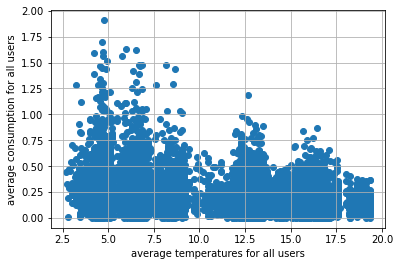

In [530]:
plt.scatter(nptemps,npEn_con)
plt.xlabel("average temperatures for all users")
plt.ylabel("average consumption for all users")
plt.grid()

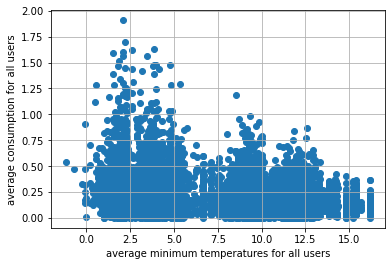

In [531]:
plt.scatter(nptemps_min,npEn_con)
plt.xlabel("average minimum temperatures for all users")
plt.ylabel("average consumption for all users")
plt.grid()

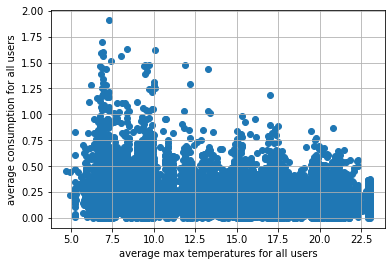

In [532]:
plt.scatter(nptemps_max,npEn_con)
plt.xlabel("average max temperatures for all users")
plt.ylabel("average consumption for all users")
plt.grid()

It's finally time to train the model <br>
from : https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [542]:
# Split the data into training/testing sets
#X_train = nptemps[:-2000] # all elements except last 2000 = 90% training set.
X_train = nptemps[:-6322] #70% trainning set
X_train = X_train.reshape(-1,1)

X_test = nptemps[-6322:] #  last 6322 elements are the test set
X_test = X_test.reshape(-1,1)
                       
X_train_min = nptemps_min[:-6322]
X_train_min = X_train_min.reshape(-1,1)

X_test_min = nptemps_min[-6322:]
X_test_min = X_test_min.reshape(-1,1)

X_train_max = nptemps_max[:-6322]
X_train_max = X_train_max.reshape(-1,1)

X_test_max = nptemps_max[-6322:]
X_test_max = X_test_max.reshape(-1,1)
# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_train = npEn_con[:-6322].reshape(-1,1)

y_test = npEn_con[-6322:]
y_test = y_test.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()
regr_min= linear_model.LinearRegression()
regr_max= linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
regr_min.fit(X_train_min, y_train)
regr_max.fit(X_train_max, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred_min = regr_min.predict(X_test_min)
y_pred_max = regr_max.predict(X_test_max)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
print('Mean squared error min: %.8f'
      % mean_squared_error(y_test, y_pred_min))
print('Mean squared error max: %.8f'
      % mean_squared_error(y_test, y_pred_max))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-0.00831305]]
Mean squared error: 0.02165862
Mean squared error min: 0.02170810
Mean squared error max: 0.02164935
Coefficient of determination: 0.05


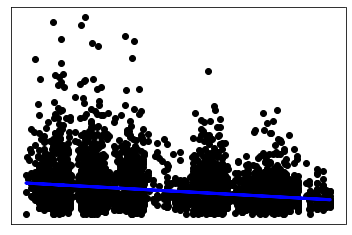

In [543]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

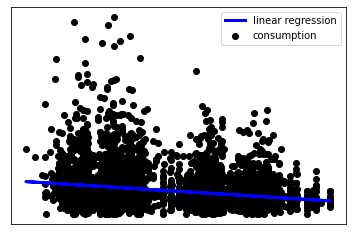

In [547]:
# Plot outputs
plt.scatter(X_test_min, y_test,  color='black', label = "consumption")
plt.plot(X_test_min, y_pred_min, color='blue', linewidth=3, label = "linear regression")
plt.legend()
plt.xticks(())
plt.yticks(())

plt.show()

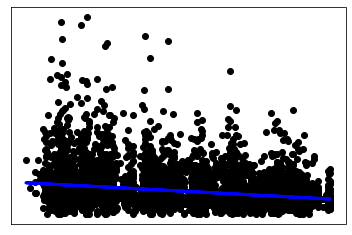

In [545]:
# Plot outputs
plt.scatter(X_test_max, y_test,  color='black')
plt.plot(X_test_max, y_pred_max, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

It could be that the prediction on the test set is better than a prediction on for a new data set because there are relativly few values for the temperature in the training/test data

## Combine temps for multi linear model

In [549]:
np_combinedtemps= np.zeros(shape = (len(temps), 3))

for i in range(len(temps)):
    
    np_combinedtemps[i, 0] = temps[i]
    np_combinedtemps[i, 1] = temps_min[i]
    np_combinedtemps[i, 2]  = temps_max[i]


it's training time

In [550]:
# Split the data into training/testing sets
X_train_comb = np_combinedtemps[:-6322]
X_test_comb = np_combinedtemps[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_comb))

Coefficients: 
 [[-0.00831305]]
Mean squared error: 0.02164496
Coefficient of determination: 0.05


### Question:
What could be done to improve it? Why is it that bad? It almost does not improve with the different models we use.

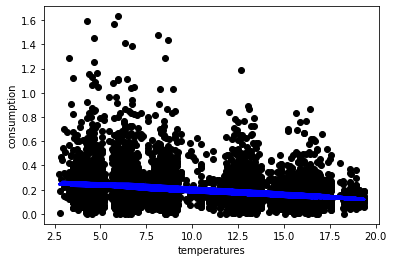

In [312]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_comb, color='blue', linewidth=3)

plt.xlabel("temperatures")
plt.ylabel("consumption")
plt.show()

### Including the months in the model's training set:

### Question (TODO):
Which features should we one-hot encode?

In [558]:
np_features= np.zeros(shape = (len(temps), 4))

for i in range(len(temps)):
    
    np_features[i, 0] = temps[i]
    np_features[i, 1] = temps_min[i]
    np_features[i, 2]  = temps_max[i]
    np_features[i, 3]  = month_arr[i]


### Training with temperatures and months as features

In [559]:
# Split the data into training/testing sets
X_train_comb = np_features[:-6322]
X_test_comb = np_features[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)


# The coefficients
print('Coefficients: \n', regr_comb.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_comb))

Coefficients: 
 [ 0.03033648 -0.01892898 -0.01855107  0.00239188]
Mean squared error: 0.02185707
Coefficient of determination: 0.04


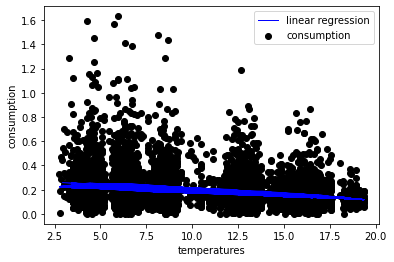

In [560]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black', label = "consumption")
plt.plot(X_test, y_pred_comb, color='blue', linewidth=1, label = "linear regression")
plt.legend()
plt.xlabel("temperatures")
plt.ylabel("consumption")
plt.show()

### Polynomial regression 

In [317]:
# train_months=npmonth_arr[:-6322]
# print(train_months.shape)
# train_months=train_months.reshape(-1, 1)
# train_months.shape

(14752,)


(14752, 1)

In [561]:
# Split the data into training/testing sets
X_train_comb = np_features[:-6322]
X_test_comb = np_features[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


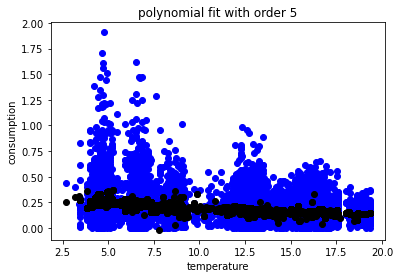

Coefficients: 
 [-2.74064617e-06 -8.79263230e+01  3.60102459e+01  5.25728960e+01
 -1.66834171e+01 -8.42979549e+00 -9.48316719e+00  3.86642876e+01
  6.01037550e+00  6.40956756e+00 -8.15897160e+00 -1.67743559e+00
 -1.90881957e+01 -2.20557212e+00  3.84881564e+00  2.03252694e+01
 -2.44865293e+01 -3.48391721e+01  1.06128034e+01  8.15161026e+00
  3.27248256e+01 -8.62311560e+00  1.59159328e+01 -1.15956966e+01
 -2.33354323e+00 -4.92393187e-01 -7.11473256e+00  1.95960410e+00
 -8.57431459e+00  4.49121047e+00  7.67711829e-01 -1.63933194e+00
  3.18076864e+00  1.09511026e+00 -3.82526823e-01  1.18067515e+01
 -1.81223591e+01 -2.67943501e+01 -6.87633894e+00  1.00524818e+01
  3.05067880e+01  1.08328433e+01  2.31629055e+01  9.68120615e+00
 -1.19593519e+00 -2.40341597e+00 -1.08421956e+01 -5.54050450e+00
 -1.78545123e+01 -1.05191008e+01  1.05960516e+00 -8.80461667e+00
 -4.31300190e+00  1.13346615e+00  3.60332424e-01  2.12419486e-01
  1.16713650e+00  9.30506526e-01  3.20801686e+00  2.74684379e+00
 -2.62832

In [598]:
# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 5

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_train_comb) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_train_comb))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_test_comb))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='blue')
    plt.scatter(X_train, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred_poly))

### Question:

We increase the degree here but the4 MSE gets terribly worse. What might have gone wrong?

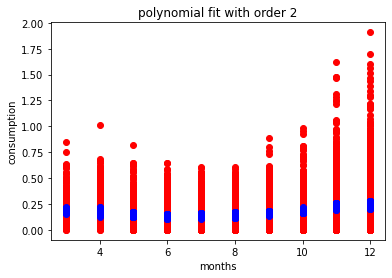

In [566]:
plt.scatter(train_months, y_train, color='red')
plt.scatter(train_months, poly_vals, color='blue')
plt.xlabel('months')
plt.ylabel('consumption')
plt.title("polynomial fit with order " +str(polynom_degree))
plt.show()

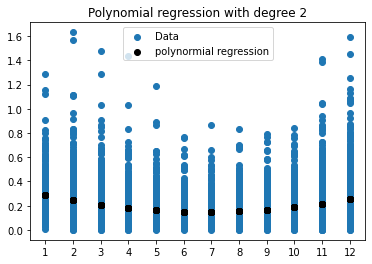

In [570]:
test_months=npmonth_arr[-6322:]
test_months=test_months.reshape(-1, 1)

plt.scatter(test_months,y_test, label = "Data")
plt.scatter(test_months,polyreg.predict(test_months),color="black",
            label = "polynormial regression")
plt.title("Polynomial regression with degree "+str(degree))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11 ,12])
plt.legend()
plt.show()

In [327]:
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, polyreg.predict(test_months)))

Mean squared error: 0.02168857


In [591]:
info_sorted['dwelling_type']

meter_id
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    terraced_house
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da               NaN
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f               NaN
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407               NaN
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f               NaN
                                                   ...      
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065               NaN
0xfdaf9f857621ec06f2cf801f42a020a322835090               NaN
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    terraced_house
0x47218b46abb2fcaade487a211911406dc6e13730               NaN
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd               NaN
Name: dwelling_type, Length: 3248, dtype: object

In [599]:
brinfo=info_sorted['num_bedrooms']
br_NaNs_number = brinfo.isnull().sum()
print("number of users with+NaN bedroom info = ", brinfo.shape[0])
print("number of users with NaN bedroom info = ", br_NaNs_number)
print("percentage of NaN values in num_bedrooms = ", br_NaNs_number/brinfo.shape[0])
print(np_features.shape)

number of users with+NaN bedroom info =  3248
number of users with NaN bedroom info =  1389
percentage of NaN values in num_bedrooms =  0.42764778325123154
(21074, 4)


#### Question:

Can we train the model with all data while a feaure has less available data without 
having to impute the missing values?

 Values must be deleted here because of the NaN values as a result of the re-indexing.

We should use past data in the model.

In [711]:
# Filling the mean value for the NaN values in num_bedrooms column:
values = {'num_bedrooms' : brinfo.mean()}
info_filled_br = info_sorted.fillna(value = values)
info_filled_br

,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,efficient_lighting_percentage,...,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,terraced_house,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xfdaf9f857621ec06f2cf801f42a020a322835090,NaN,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,terraced_house,NaN,3.112426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [717]:
brinfo_filled = info_filled_br['num_bedrooms']
brinfo_filled.tail()

meter_id
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    3.112426
0xfdaf9f857621ec06f2cf801f42a020a322835090    3.112426
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    3.112426
0x47218b46abb2fcaade487a211911406dc6e13730    3.112426
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd    3.112426
Name: num_bedrooms, dtype: float64

We discarded the users with threshold < 1200 for the consumption and temperature data. We do this as well for the "num_bedrooms" data for consistency.

In [720]:
br_arr = []
NaN_t = 1200

for i in range(0,df.shape[0]):
    #load rows
    meter=df.iloc[i]
    row = brinfo_filled[i:i+1]
    
    # loop over all months
    for m in range (1,13):
        begin_index, end_index = get_monthi(m)      #get index of beginning and end of month
        month=meter[begin_index:end_index]
        
        # Check if months have numeric values        
        n_NaN=month.isnull().sum() #Number of NaN's
        
        if n_NaN<NaN_t:            
            br_arr.append(row[0])

In [737]:
npbr_arr = np.zeros(len(br_arr)) #converting it into numpy array.

for i in range(len(br_arr)):
    npbr_arr[i] = br_arr[i]

Text(0, 0.5, 'energy consumption')

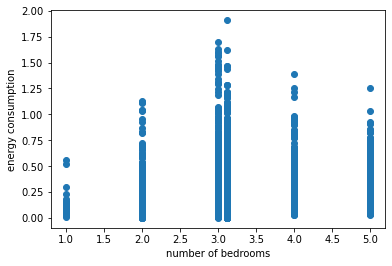

In [739]:
plt.scatter(npbr_arr,npEn_con)
plt.xlabel("number of bedrooms")
plt.ylabel("energy consumption")

#### Linear and polynomial multivariate regression

In [740]:
combinefeatures=[]
for i in range(len(temps)):
    temp=[]
    temp.append(temps[i])
    temp.append(temps_min[i])
    temp.append(temps_max[i])
    temp.append(month_arr[i])
    temp.append(br_arr[i])
    combinefeatures.append(temp)
    
npcombinefeatures=np.array(combinefeatures)
npcombinefeatures=npcombinefeatures.reshape(-1,5)

In [747]:
npcombinefeatures.shape

(21074, 5)

In [806]:
#Linear regression: 
# Split the data into training/testing sets
X_train_comb = npcombinefeatures[:-6322]
X_test_comb = npcombinefeatures[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)

# The coefficients
print('Coefficients: \n', regr_comb.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_comb))

Coefficients: 
 [ 0.02829244 -0.01704597 -0.01821752  0.00225326  0.04825521]
Mean squared error: 0.02132112
Coefficient of determination: 0.07


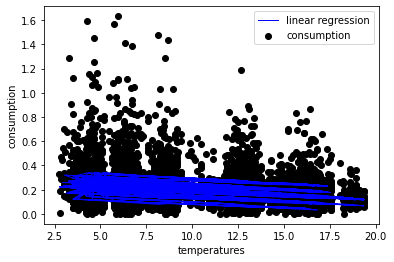

In [762]:
plt.scatter(X_test, y_test,  color='black', label = "consumption")
plt.plot(X_test, y_pred_comb, color='blue', linewidth=1, label = "linear regression")
plt.legend()
plt.xlabel("temperatures")
plt.ylabel("consumption")
plt.show()


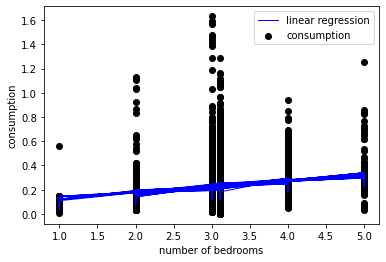

In [763]:
plt.scatter(test_br, y_test,  color='black', label = "consumption")
plt.plot(test_br, y_pred_comb, color='blue', linewidth=1, label = "linear regression")
plt.legend()
plt.xlabel("number of bedrooms")
plt.ylabel("consumption")
plt.show()

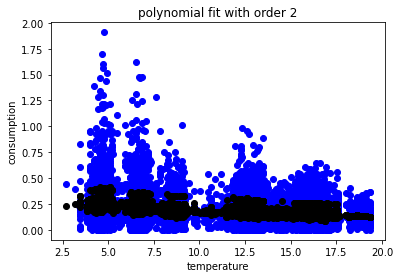

Coefficients: 
 [ 0.00000000e+00  3.08110757e-01 -1.65791082e-01 -1.47961132e-01
 -8.75543558e-03  5.36494787e-03  9.52038346e-03  1.91061639e-02
 -4.35531223e-02 -1.07221038e-03  8.90593444e-03 -1.32018206e-02
  9.54996936e-03  9.34506096e-04 -6.29238757e-03  1.86489276e-02
  3.05417677e-04 -4.53107334e-03  9.37455243e-04 -1.06277148e-03
  1.02644132e-02]
Mean squared error: 0.02123720
Coefficient of determination: 0.07178280


In [766]:
#Polynomial regression:

X_train_comb = npcombinefeatures[:-6322]
X_test_comb = npcombinefeatures[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]



# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_train_comb) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_train_comb))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_test_comb))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='blue')
    plt.scatter(X_train, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred_poly))

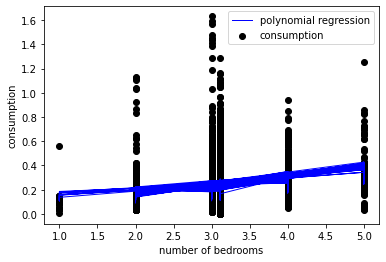

In [769]:
plt.scatter(test_br, y_test,  color='black', label = "consumption")
plt.plot(test_br, y_pred_poly, color='blue', linewidth=1, label = "polynomial regression")
plt.legend()
plt.xlabel("number of bedrooms")
plt.ylabel("consumption")
plt.show()

### Feature scaling

In [775]:
from sklearn import preprocessing
X_train_comb = npcombinefeatures[:-6322]
X_test_comb = npcombinefeatures[-6322:]

# Split the targets into training/testing sets
y_train = npEn_con[:-6322]
y_test = npEn_con[-6322:]


X_scaled_train = preprocessing.scale(X_train_comb)
X_scaled_test = preprocessing.scale(X_test_comb)

y_scaled_train = preprocessing.scale(y_train)
y_scaled_test = preprocessing.scale(y_test)

In [798]:
#X_train_comb[i][0]    #= average temperature
X_train_comb[:, 0] # = average temperature.
print("non scaled = ", X_train_comb[0][0])
print("non scaled = ", X_train[0][0])
print("scaled = ", X_scaled_train[0][0])
X_scaled_train[:, 0] # = average temperatures scaled.
avg_temps_scaled = X_scaled_train[:, 0] 

non scaled =  meter_id
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7    4.681048
dtype: float64
non scaled =  4.681048387096775
scaled =  -1.468143153102461


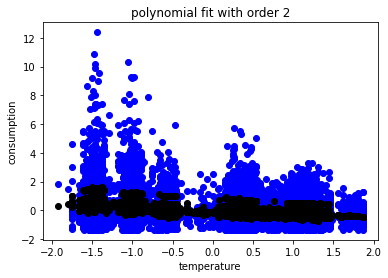

Coefficients: 
 [ 0.          1.67492343 -0.81333134 -1.05574634  0.07952614  0.17117354
  1.32977466  2.38215768 -6.93323341 -0.08302817  0.15036672 -1.46927885
  1.35703766  0.06459531 -0.09483335  3.38347759  0.02695458 -0.08718991
  0.04024555 -0.00994796  0.0209486 ]
Mean squared error: 0.93213719
Coefficient of determination: 0.06786281


In [801]:
#Polynomial regression:

# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_scaled_train) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_scaled_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_scaled_train))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_scaled_test))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(avg_temps_scaled, y_scaled_train, color='blue')
    plt.scatter(avg_temps_scaled, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_scaled_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_scaled_test, y_pred_poly))

Not scaling consumption:

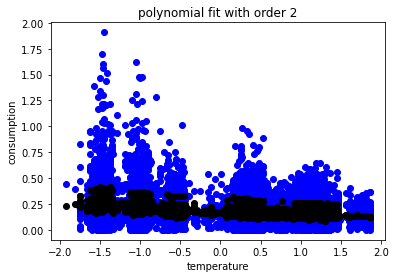

Coefficients: 
 [ 0.          0.23254218 -0.11292089 -0.14657718  0.01104121  0.02376531
  0.18462259  0.33073282 -0.9625928  -0.01152742  0.02087654 -0.203991
  0.18840772  0.00896825 -0.01316643  0.46975357  0.00374231 -0.01210523
  0.00558759 -0.00138115  0.00290845]
Mean squared error: 0.02137432
Coefficient of determination: 0.06578958


In [809]:
#Polynomial regression:

# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_scaled_train) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_scaled_train))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_scaled_test))

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(avg_temps_scaled, y_train, color='blue')
    plt.scatter(avg_temps_scaled, poly_vals, color='black')
    plt.xlabel('temperature')
    plt.ylabel('consumption')
    plt.title("polynomial fit with order " +str(polynom_degree))
    plt.show()
    return
viz_polymonial()
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred_poly))

Linear regression with feature scaling

In [813]:
# Create linear regression object
regr_comb_sc = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb_sc.fit(X_scaled_train, y_train)


# Make predictions using the testing set
y_pred_comb_sc = regr_comb_sc.predict(X_scaled_test)

# The coefficients
print('Coefficients: \n', regr_comb_sc.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb_sc))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_comb_sc))

Coefficients: 
 [ 0.12459068 -0.06700547 -0.09143184  0.00550108  0.02568669]
Mean squared error: 0.02112914
Coefficient of determination: 0.08


Note: I think there is something wrong with either the linear or the polynomial models, because when I use degree = 1 in the polynomial model, poly and linear models give different results. Or maybe because of the feature fitting they result in different values?

### TODO: 

https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features